In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Stochastic Bandits

## Exploration Then Commit (ETC)

In [75]:
# a: the arm we choose to pull
# mu2: the true value of the mean for arm 2
def pullGaussian1(a,mu2):
        if a == 1:
            return np.random.normal(0,1)
        return np.random.normal(mu2,1)
    
def pullBernoulli1(a,p):
        if a == 1:
            p = 0.5
            return np.random.binomial(1,p)
        return np.random.binomial(1,p)

# m is the number of times we explore arm a
# n is the horizons or the number of times we play
# mu2 is the mean of arm bandit 2
def ETC(m,n,mu2,comment=False,gaussian=1):
    arm_means = [0,0]
    true_mean = [0,mu2]
    arm_pulls = [0,0]
    if gaussian == 1:
        mu1 = 0
        optimal = mu2 if mu2 > mu1 else mu1
    else:
        mu1 = 0.5
        optimal = mu2 if mu2 > mu1 else mu1
    
    # exploration phase
    exploration_regret = (optimal - mu2)*m + (optimal - mu1)*m
    
    if gaussian == 1:
        reward_1 = [pullGaussian1(1,mu2) for a in range(m)]
        reward_2 = [pullGaussian1(2,mu2) for a in range(m)]
    else:
        reward_1 = [pullBernoulli1(1,mu2) for a in range(m)]
        reward_2 = [pullBernoulli1(2,mu2) for a in range(m)]
    empirical_mean_1 = np.mean(reward_1)
    empirical_mean_2 = np.mean(reward_2)
    # exploitation phase
    best_mean = mu2 if empirical_mean_1 < empirical_mean_2 else mu1
    best_arm = 1 if empirical_mean_1 < empirical_mean_2 else 0
    if comment:
        print("arm1 mean:" + str(mu1))
        print("arm2 mean:" + str(mu2))
        print("best arm:" + str(best_arm))
        print("optimal arm:" + str(optimal))
    
    #reward_exploit = [pullGaussian(best_arm,mu2) for i in range(n - 2*m)]
    #reward = pullGaussian(best_arm,mu2)
    exploitation_regret = (optimal - best_mean)*(n-2*m)
    
        
    total_regret = exploitation_regret + exploration_regret
    
    if comment:
        print("exploration regret:" + str(exploration_regret))
        print("exploitation regret:" + str(exploitation_regret))
        print("total regret:" + str(total_regret))
        print("best arm true mean:" + str(true_mean[best_arm-1]))
        print("\n")
    
    
    return total_regret

In [4]:
# simulating ETC's N parameter
# Function takes in lists for m, n (horizon), and mu2 and
# performs a grid search of each set of parameters.
# Will ignore permutations where n <= m.
def simulationN_ETC(mu2,m,n=1000,num_sim=1000,gaussian=1):
    df = pd.DataFrame()
    df['mu2'] = mu2
    det = [determine_m(a) for a in mu2]
    for j in tqdm(m):            
        point_lst = []
        err_lst = []
        for i in tqdm(mu2):
            if j != 1000:
                simulation = [ETC(m=j,n=n,mu2=i,gaussian=gaussian) for a in range(num_sim)]
            else:
                simulation = [ETC(m=determine_m(i),n=n,mu2=i,gaussian=gaussian) for a in range(num_sim)]
            point = np.mean(simulation)
            err = np.var(simulation)
            point_lst += [point]
            err_lst += [err]
        
        df[str(j) + "point"] = point_lst
        df[str(j) + "error"] = err_lst
    return df

In [5]:
def determine_m(mu2):
    return int(max(1,np.ceil(4*np.log(250*mu2**2)/mu2**2)))

## Upper Confidence Bound Algorithms (UCB)

In [96]:
def pullGaussian(mu):
    return np.random.normal(mu,1)
    
def pullBernoulli(p):
    return np.random.binomial(1,p)

def simulationN_standard(mu2,n=1000,num_sim=1000,gaussian=1):
    point_lst = []
    var_lst = []
    df = pd.DataFrame()
    for m in tqdm(mu2):
        simulation = [UCB_standard(n=n,mu2=m,gaussian=gaussian) for a in range(num_sim)]
        point = np.mean(simulation)
        var = np.var(simulation)
        point_lst += [point]
        var_lst += [var]
    df['point'] = point_lst
    df['var'] = var_lst
    return df

def simulationN_asymptotic(mu2,n=1000,num_sim=1000,gaussian=True):
    point_lst = []
    var_lst = []
    df = pd.DataFrame()
    for m in tqdm(mu2):
        simulation = [UCB_asymptotic(n=n,mu2=m,gaussian=1) for a in range(num_sim)]
        point = np.mean(simulation)
        var = np.var(simulation)
        point_lst += [point]
        var_lst += [var]
    df['point'] = point_lst
    df['var'] = var_lst
    return df

def simulationN_moss(mu2,n=1000,num_sim=1000,gaussian=1):
    point_lst = []
    var_lst = []
    df = pd.DataFrame()
    for m in tqdm(mu2):
        simulation = [UCB_moss(n=n,mu2=m,gaussian=gaussian) for a in range(num_sim)]
        point = np.mean(simulation)
        var = np.var(simulation)
        point_lst += [point]
        var_lst += [var]
    df['point'] = point_lst
    df['var'] = var_lst
    return df

def simulationN_KL(mu2,n=1000,num_sim=1000,gaussian=True):
    point_lst = []
    var_lst = []
    df = pd.DataFrame()
    for m in tqdm(mu2):
        simulation = [UCB_KL(n=n,mu2=m,gaussian=1) for a in range(num_sim)]
        point = np.mean(simulation)
        var = np.var(simulation)
        point_lst += [point]
        var_lst += [var]
    df['point'] = point_lst
    df['var'] = var_lst
    return df

In [78]:
mu2_fast = [0.01*i for i in range(0,101)]

ucb_s = simulationN_standard(mu2_fast,n=1000,num_sim=100,gaussian=1)
ucb_a = simulationN_asymptotic(mu2_fast,n=1000,num_sim=100,gaussian=1)
ucb_m = simulationN_moss(mu2_fast,n=1000,num_sim=100,gaussian=1)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [19:07<00:00, 11.36s/it]


In [84]:
ucb_s_b = simulationN_standard(mu2_fast,n=1000,num_sim=100,gaussian=2)
ucb_m_b = simulationN_moss(mu2_fast,n=1000,num_sim=100,gaussian=2)
ucb_k_b = simulationN_KL(mu2_fast,n=1000,num_sim=100,gaussian=2)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [38:37<00:00, 22.95s/it]


In [93]:
mu2_fasta = [0.01*x for x in range(0,101)]

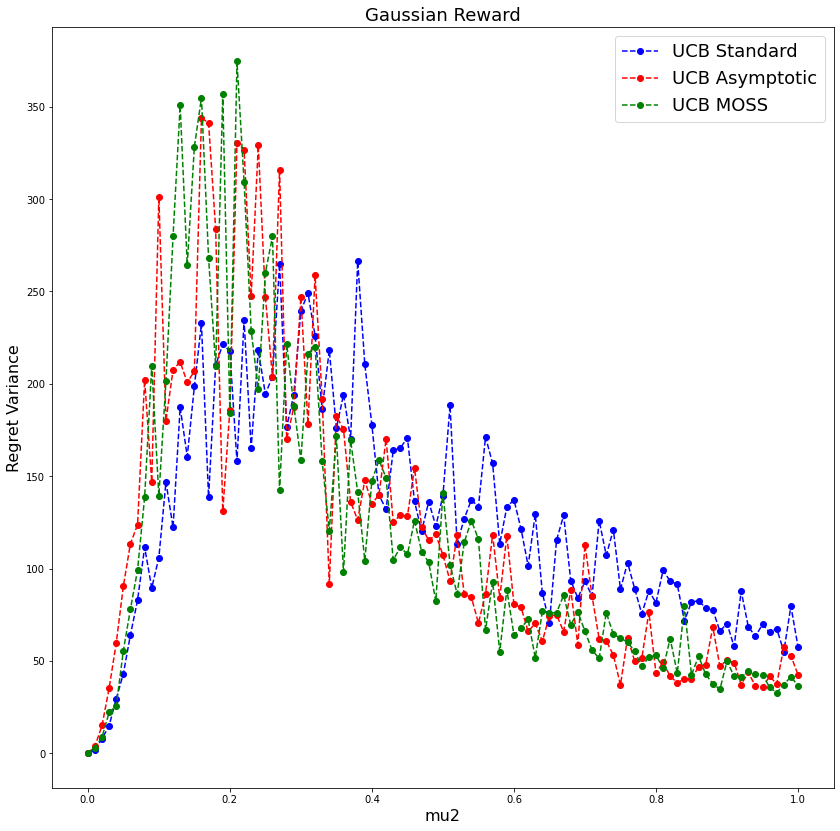

In [115]:
fig, ax = plt.subplots()
fig.set_figheight(14)
fig.set_figwidth(14)
plt.plot(mu2_fasta,ucb_s['var'],"--bo",color='blue')
plt.plot(mu2_fasta,ucb_a['var'],"--bo",color='red')
plt.plot(mu2_fasta,ucb_m['var'],"--bo",color='green')
#plt.plot(mu2,df33['point'],"--bo",color='red')
#plt.plot(sim44['mu1'],sim44['regret'],"--bo",color='black')

ax.set_title("Gaussian Reward",fontsize=18)
ax.set_xlabel('mu2', fontsize=16)
ax.set_ylabel('Regret Variance', fontsize=16)
plt.legend(['UCB Standard', 'UCB Asymptotic','UCB MOSS'],prop={'size': 18})
#ax.tick_params(axis='both', which='major', labelsize=16)

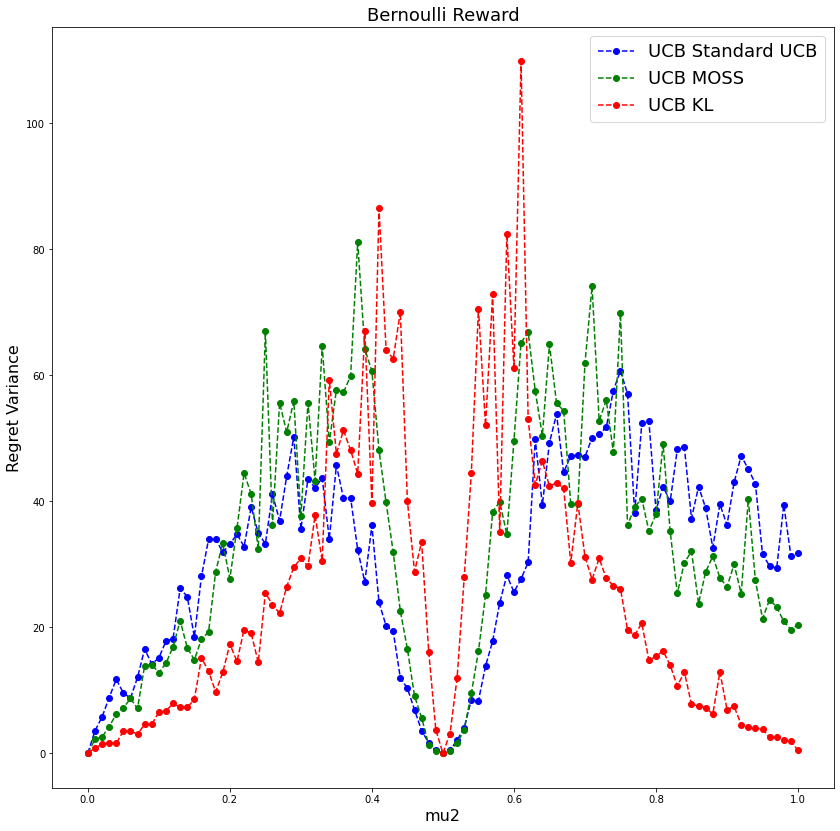

In [95]:
fig, ax = plt.subplots()
fig.set_figheight(14)
fig.set_figwidth(14)
plt.plot(mu2_fasta,ucb_s_b['var'],"--bo",color='blue')
plt.plot(mu2_fasta,ucb_m_b['var'],"--bo",color='green')
plt.plot(mu2_fasta,ucb_k_b['var'],"--bo",color='red')
#plt.plot(mu2,df33['point'],"--bo",color='red')
#plt.plot(sim44['mu1'],sim44['regret'],"--bo",color='black')

ax.set_title("Bernoulli Reward",fontsize=18)
ax.set_xlabel('mu2', fontsize=16)
ax.set_ylabel('Regret Variance', fontsize=16)
plt.legend(['UCB Standard UCB', 'UCB MOSS','UCB KL'],prop={'size': 18})
#ax.tick_params(axis='both', which='major', labelsize=16)

In [41]:
def UCB_standard(n,mu2,gaussian=1):
    if mu2 == 0:
        return 0
    reward = [pullGaussian(0),pullGaussian(mu2)] if gaussian == 1 else [pullBernoulli(0.5),pullBernoulli(mu2)]
    rewards1 = [reward[0]]
    rewards2 = [reward[1]]
    ti = [1,1]
    t = 2
    regret = 0
    if gaussian == 1:
        optimal = 0 if mu2 < 0 else 1
    else:
        optimal = 0 if mu2 < 0.5 else 1
    
    while(t < n):
        ucb = [np.mean(rewards1) + np.sqrt(2*np.log(n**2)/ti[0]),np.mean(rewards2) + np.sqrt(2*np.log(n**2)/ti[1])]
        argmax = np.argmax(ucb)
        reward = [pullGaussian(0),pullGaussian(mu2)] if gaussian == 1 else [pullBernoulli(0.5),pullBernoulli(mu2)]
        
        if argmax == 0:
            rewards1 += [reward[0]]
        else:
            rewards2 += [reward[1]]
        ti[argmax] += 1
        t+=1
        if gaussian == 1:
            regret += 0 if optimal == argmax else mu2
        else:
            regret += 0 if optimal == argmax else abs(mu2-0.5)
    return regret

In [40]:
def UCB_asymptotic(n,mu2,gaussian=1):
    if mu2 == 0:
        return 0
    reward = [pullGaussian(0),pullGaussian(mu2)] if gaussian == 1 else [pullBernoulli(0.5),pullBernoulli(mu2)]
    rewards1 = [reward[0]]
    rewards2 = [reward[1]]
    ti = [1,1]
    t = 2
    regret = 0
    optimal = 0 if mu2 < 0 else 1
    
    while(t < n):
        ft = np.log(1 + t*np.log(np.log(t)))
        ucb = [np.mean(rewards1) + np.sqrt(2*ft/ti[0]),np.mean(rewards2) + np.sqrt(2*ft/ti[1])]
        argmax = np.argmax(ucb)
        reward = [pullGaussian(0),pullGaussian(mu2)] if gaussian == 1 else [pullBernoulli(0.5),pullBernoulli(mu2)]
        
        if argmax == 0:
            rewards1 += [reward[0]]
        else:
            rewards2 += [reward[1]]
        ti[argmax] += 1
        t+=1
        regret += 0 if optimal == argmax else mu2
    
    return regret

In [39]:
def log_plus(n,t):
    x = n / (2  *t)
    return np.log(max(1,x))

def UCB_moss(n,mu2,gaussian=1):
    if mu2 == 0: 
        return 0
    reward = [pullGaussian(0),pullGaussian(mu2)] if gaussian == 1 else [pullBernoulli(0.5),pullBernoulli(mu2)]
    rewards1 = [reward[0]]
    rewards2 = [reward[1]]
    ti = [1,1]
    t = 2
    regret = 0
    if gaussian == 1:
        optimal = 0 if mu2 < 0 else 1
    else:
        optimal = 0 if mu2 < 0.5 else 1
        
    while(t < n):
        if t != 1:
            ft = 1 + t*np.log(t)*np.log(t)
            
        ucb = [np.mean(rewards1) + np.sqrt((4/ti[0])*log_plus(n,ti[0])),np.mean(rewards2) + np.sqrt((4/ti[1])*log_plus(n,ti[1]))]
        argmax = np.argmax(ucb)
        reward = [pullGaussian(0),pullGaussian(mu2)] if gaussian == 1 else [pullBernoulli(0.5),pullBernoulli(mu2)]
        
        if argmax == 0:
            rewards1 += [reward[0]]
        else:
            rewards2 += [reward[1]]
        ti[argmax] += 1
        t+=1
        if gaussian == 1:
            regret += 0 if optimal == argmax else mu2
        else:
            regret += 0 if optimal == argmax else abs(mu2-0.5)
    
    return regret

In [83]:
def d(p,q):
    if (p == 0):
        if (q < 1 and q > 0):
            return np.log(1/(1-q))
        else:
            return 0
    if (p == 1):
        if (q < 1 and q > 0):
            return np.log(1/q)
        else:
            return 1
    return p*np.log(p/q) + (1-p)*np.log((1-p)/(1-q))

def calculate_ucb(p,t,ti):
    ft = 1 + t*(np.log(np.log(t)))
    upper_bound = np.log(ft) / ti
    bounds = [p,1]
    for i in range(10):
       
        half = (sum(bounds)) / 2
        if bounds[1]-bounds[0] < 1e-5:
             #early stopping
            break
        
        entropy = d(p,half)

        if entropy < upper_bound:
            bounds[0] = half
        else:
            bounds[1] = half

    return half

def UCB_KL(n,mu2,gaussian=1):
    if mu2 == 0.5:
        return 0
    reward = [pullBernoulli(0.5),pullBernoulli(mu2)]
    rewards1 = [reward[0]]
    rewards2 = [reward[1]]
    ti = [1,1]
    t = 2
    regret = 0
    optimal = 0 if mu2 < 0.5 else 1
    
    while(t < n): 
        #ucb = calculate_ucb(np.array([np.mean(rewards1),np.mean(rewards2)]),t,ti[0])
        ucb = [calculate_ucb(np.mean(rewards1),t,ti[0]),calculate_ucb(np.mean(rewards2),t,ti[1])]
        #print(ucb)
        argmax = np.argmax(ucb)
        
        reward = [pullBernoulli(0.5),pullBernoulli(mu2)]
        
        if argmax == 0:
            rewards1 += [reward[0]]
        else:
            rewards2 += [reward[1]]
        ti[argmax] += 1
        t+=1
        regret += 0 if optimal == argmax else abs(mu2-0.5)
    
    return regret

## Thompson Sampling

In [97]:
def simulationN_TS1(mu2,p1,p2,n=1000,num_sim=1000):
    point_lst = []
    var_lst = []
    for i in tqdm(mu2):
        simulation = [thompson_sampling_gaussian(n=n,mu2=i,p1=p1,p2=p2) for a in range(num_sim)]
        point = np.mean(simulation)
        print(point)
        var = np.var(simulation)
        point_lst += [point]
        var_lst += [var]
    df = pd.DataFrame()
    df['mu2'] = mu2
    df['regret'] = point_lst
    df['var'] = var_lst
    return df

def simulationN_TS2(mu2,p1,p2,n=1000,num_sim=1000):
    point_lst = []
    var_lst = []
    for i in tqdm(mu2):
        simulation = [thompson_sampling_bernoulli(n=n,mu2=i,p1=p1,p2=p2) for a in range(num_sim)]
        point = np.mean(simulation)
        print(point)
        var = np.var(simulation)
        point_lst += [point]
        var_lst += [var]
    df = pd.DataFrame()
    df['mu2'] = mu2
    df['regret'] = point_lst
    df['var'] = var_lst
    return df

In [98]:
mu2_fast = [0.01*x for x in range(0,101,5)]

In [102]:
tsG1 = simulationN_TS1(mu2_fast,[0,1],[0,1],n=1000,num_sim=100)
tsG2 = simulationN_TS1(mu2_fast,[0,1],[1/2,1],n=1000,num_sim=100)
tsG3 = simulationN_TS1(mu2_fast,[1/2,1],[0,1],n=1000,num_sim=100)
tsG4 = simulationN_TS1(mu2_fast,[0,.1],[1/2,.1],n=1000,num_sim=100)
tsG5 = simulationN_TS1(mu2_fast,[1/2,.1],[0,.1],n=1000,num_sim=100)

  5%|███▉                                                                               | 1/21 [00:08<02:42,  8.11s/it]

0.0


 10%|███████▉                                                                           | 2/21 [00:17<02:44,  8.66s/it]

19.916999999999966


 14%|███████████▊                                                                       | 3/21 [00:25<02:35,  8.62s/it]

31.19599999999998


 19%|███████████████▊                                                                   | 4/21 [00:34<02:25,  8.56s/it]

27.988500000000094


 24%|███████████████████▊                                                               | 5/21 [00:42<02:17,  8.59s/it]

41.291999999999945


 29%|███████████████████████▋                                                           | 6/21 [00:52<02:15,  9.02s/it]

34.2325


 33%|███████████████████████████▋                                                       | 7/21 [01:01<02:05,  8.99s/it]

27.516000000000066


 38%|███████████████████████████████▌                                                   | 8/21 [01:11<01:59,  9.19s/it]

30.642499999999927


 43%|███████████████████████████████████▌                                               | 9/21 [01:21<01:54,  9.57s/it]

22.563999999999993


 48%|███████████████████████████████████████                                           | 10/21 [01:30<01:41,  9.20s/it]

18.0675


 52%|██████████████████████████████████████████▉                                       | 11/21 [01:38<01:31,  9.13s/it]

19.935


 57%|██████████████████████████████████████████████▊                                   | 12/21 [01:48<01:22,  9.20s/it]

17.572499999999994


 62%|██████████████████████████████████████████████████▊                               | 13/21 [01:57<01:12,  9.12s/it]

19.601999999999986


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [02:06<01:04,  9.15s/it]

15.38549999999999


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [02:15<00:54,  9.14s/it]

17.38099999999997


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [02:25<00:46,  9.29s/it]

14.0325


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [02:33<00:36,  9.09s/it]

13.728000000000002


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [02:42<00:26,  8.99s/it]

14.271500000000001


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [02:51<00:17,  8.98s/it]

13.418999999999993


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [03:00<00:08,  8.89s/it]

13.404500000000002


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [03:08<00:00,  9.00s/it]


9.54


  5%|███▉                                                                               | 1/21 [00:07<02:33,  7.67s/it]

0.0


 10%|███████▉                                                                           | 2/21 [00:15<02:24,  7.61s/it]

21.046499999999977


 14%|███████████▊                                                                       | 3/21 [00:23<02:18,  7.71s/it]

28.495000000000047


 19%|███████████████▊                                                                   | 4/21 [00:30<02:11,  7.73s/it]

31.82700000000011


 24%|███████████████████▊                                                               | 5/21 [00:39<02:06,  7.91s/it]

34.61600000000003


 29%|███████████████████████▋                                                           | 6/21 [00:47<01:58,  7.92s/it]

30.385


 33%|███████████████████████████▋                                                       | 7/21 [00:55<01:51,  7.95s/it]

27.98399999999994


 38%|███████████████████████████████▌                                                   | 8/21 [01:03<01:44,  8.06s/it]

23.9155


 43%|███████████████████████████████████▌                                               | 9/21 [01:11<01:38,  8.19s/it]

35.05999999999995


 48%|███████████████████████████████████████                                           | 10/21 [01:20<01:30,  8.22s/it]

19.56599999999999


 52%|██████████████████████████████████████████▉                                       | 11/21 [01:28<01:22,  8.28s/it]

25.14


 57%|██████████████████████████████████████████████▊                                   | 12/21 [01:37<01:15,  8.42s/it]

17.462499999999995


 62%|██████████████████████████████████████████████████▊                               | 13/21 [01:46<01:09,  8.68s/it]

15.86400000000001


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [01:55<01:01,  8.73s/it]

16.575


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [02:03<00:51,  8.63s/it]

15.204


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [02:14<00:45,  9.18s/it]

12.9075


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [02:23<00:36,  9.11s/it]

12.504000000000003


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [02:31<00:26,  8.98s/it]

12.809500000000003


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [02:41<00:18,  9.06s/it]

12.762000000000002


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [02:49<00:08,  8.96s/it]

12.730000000000004


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [02:58<00:00,  8.52s/it]


10.91


  5%|███▉                                                                               | 1/21 [00:08<02:54,  8.72s/it]

0.0


 10%|███████▉                                                                           | 2/21 [00:16<02:34,  8.15s/it]

20.19499999999999


 14%|███████████▊                                                                       | 3/21 [00:23<02:20,  7.78s/it]

35.275999999999954


 19%|███████████████▊                                                                   | 4/21 [00:31<02:09,  7.64s/it]

35.071500000000185


 24%|███████████████████▊                                                               | 5/21 [00:38<02:02,  7.63s/it]

30.99800000000002


 29%|███████████████████████▋                                                           | 6/21 [00:46<01:54,  7.66s/it]

32.8125


 33%|███████████████████████████▋                                                       | 7/21 [00:54<01:47,  7.65s/it]

33.13199999999999


 38%|███████████████████████████████▌                                                   | 8/21 [01:02<01:40,  7.73s/it]

32.147500000000065


 43%|███████████████████████████████████▌                                               | 9/21 [01:09<01:33,  7.77s/it]

24.816000000000017


 48%|███████████████████████████████████████                                           | 10/21 [01:17<01:25,  7.81s/it]

29.038499999999978


 52%|██████████████████████████████████████████▉                                       | 11/21 [01:25<01:18,  7.83s/it]

30.75


 57%|██████████████████████████████████████████████▊                                   | 12/21 [01:36<01:18,  8.68s/it]

16.934499999999993


 62%|██████████████████████████████████████████████████▊                               | 13/21 [01:45<01:10,  8.75s/it]

16.997999999999998


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [01:54<01:01,  8.84s/it]

19.721000000000004


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [02:02<00:51,  8.65s/it]

17.339000000000006


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [02:10<00:42,  8.58s/it]

14.61


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [02:19<00:34,  8.52s/it]

16.479999999999997


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [02:27<00:25,  8.48s/it]

16.736499999999992


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [02:36<00:16,  8.45s/it]

13.293


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [02:44<00:08,  8.39s/it]

12.578


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [02:52<00:00,  8.22s/it]


11.32


  5%|███▉                                                                               | 1/21 [00:06<02:18,  6.93s/it]

0.0


 10%|███████▉                                                                           | 2/21 [00:14<02:16,  7.20s/it]

19.204000000000033


 14%|███████████▊                                                                       | 3/21 [00:21<02:12,  7.34s/it]

25.020000000000028


 19%|███████████████▊                                                                   | 4/21 [00:29<02:06,  7.46s/it]

24.513


 24%|███████████████████▊                                                               | 5/21 [00:37<02:02,  7.67s/it]

24.528000000000038


 29%|███████████████████████▋                                                           | 6/21 [00:46<02:00,  8.03s/it]

19.77


 33%|███████████████████████████▋                                                       | 7/21 [00:54<01:52,  8.02s/it]

25.56300000000002


 38%|███████████████████████████████▌                                                   | 8/21 [01:02<01:43,  7.98s/it]

19.831000000000014


 43%|███████████████████████████████████▌                                               | 9/21 [01:10<01:36,  8.03s/it]

16.687999999999985


 48%|███████████████████████████████████████                                           | 10/21 [01:18<01:29,  8.13s/it]

18.01349999999993


 52%|██████████████████████████████████████████▉                                       | 11/21 [01:26<01:21,  8.14s/it]

13.46


 57%|██████████████████████████████████████████████▊                                   | 12/21 [01:35<01:14,  8.22s/it]

10.983499999999998


 62%|██████████████████████████████████████████████████▊                               | 13/21 [01:43<01:06,  8.29s/it]

11.232000000000005


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [01:52<00:59,  8.50s/it]

10.776999999999996


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [02:01<00:50,  8.48s/it]

7.035000000000002


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [02:09<00:42,  8.47s/it]

6.39


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [02:18<00:33,  8.49s/it]

5.792000000000002


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [02:26<00:25,  8.39s/it]

5.015000000000001


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [02:34<00:16,  8.39s/it]

4.806


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [02:43<00:08,  8.41s/it]

4.0755


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [02:51<00:00,  8.17s/it]


2.42


  5%|███▉                                                                               | 1/21 [00:07<02:20,  7.01s/it]

0.0


 10%|███████▉                                                                           | 2/21 [00:14<02:17,  7.22s/it]

19.972


 14%|███████████▊                                                                       | 3/21 [00:22<02:16,  7.60s/it]

33.42799999999999


 19%|███████████████▊                                                                   | 4/21 [00:30<02:14,  7.90s/it]

39.94950000000019


 24%|███████████████████▊                                                               | 5/21 [00:39<02:09,  8.08s/it]

44.45600000000003


 29%|███████████████████████▋                                                           | 6/21 [00:47<02:00,  8.01s/it]

36.2725


 33%|███████████████████████████▋                                                       | 7/21 [00:55<01:53,  8.09s/it]

36.599999999999994


 38%|███████████████████████████████▌                                                   | 8/21 [01:03<01:45,  8.12s/it]

37.7755


 43%|███████████████████████████████████▌                                               | 9/21 [01:11<01:38,  8.18s/it]

25.651999999999997


 48%|███████████████████████████████████████                                           | 10/21 [01:20<01:30,  8.25s/it]

32.64749999999998


 52%|██████████████████████████████████████████▉                                       | 11/21 [01:28<01:23,  8.34s/it]

34.04


 57%|██████████████████████████████████████████████▊                                   | 12/21 [01:37<01:14,  8.32s/it]

25.090999999999994


 62%|██████████████████████████████████████████████████▊                               | 13/21 [01:45<01:05,  8.25s/it]

29.609999999999978


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [01:53<00:59,  8.44s/it]

30.51100000000001


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [02:03<00:51,  8.66s/it]

20.328000000000003


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [02:12<00:44,  9.00s/it]

25.3125


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [02:22<00:37,  9.28s/it]

20.991999999999994


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [02:32<00:27,  9.31s/it]

20.179


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [02:41<00:18,  9.29s/it]

20.879999999999992


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [02:49<00:09,  9.03s/it]

20.178


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [02:58<00:00,  8.50s/it]

20.97


In [103]:
tsB1 = simulationN_TS2(mu2_fast,[1,1],[1,1],n=1000,num_sim=100)
tsB2 = simulationN_TS2(mu2_fast,[1,1],[1,3],n=1000,num_sim=100)
tsB3 = simulationN_TS2(mu2_fast,[10,10],[10,10],n=1000,num_sim=100)
tsB4 = simulationN_TS2(mu2_fast,[10,10],[10,30],n=1000,num_sim=100)


  5%|███▉                                                                               | 1/21 [00:01<00:33,  1.69s/it]

4.48


 10%|███████▉                                                                           | 2/21 [00:03<00:33,  1.78s/it]

4.977000000000001


 14%|███████████▊                                                                       | 3/21 [00:05<00:34,  1.93s/it]

5.572000000000002


 19%|███████████████▊                                                                   | 4/21 [00:07<00:31,  1.84s/it]

6.142499999999997


 24%|███████████████████▊                                                               | 5/21 [00:09<00:28,  1.80s/it]

6.168000000000001


 29%|███████████████████████▋                                                           | 6/21 [00:10<00:26,  1.77s/it]

6.9625


 33%|███████████████████████████▋                                                       | 7/21 [00:12<00:24,  1.77s/it]

8.269999999999996


 38%|███████████████████████████████▌                                                   | 8/21 [00:14<00:23,  1.78s/it]

10.604999999999995


 43%|███████████████████████████████████▌                                               | 9/21 [00:16<00:20,  1.75s/it]

11.115


 48%|███████████████████████████████████████                                           | 10/21 [00:17<00:19,  1.76s/it]

12.80050000000003


 52%|██████████████████████████████████████████▉                                       | 11/21 [00:19<00:17,  1.74s/it]

0.0


 57%|██████████████████████████████████████████████▊                                   | 12/21 [00:21<00:16,  1.81s/it]

11.461500000000028


 62%|██████████████████████████████████████████████████▊                               | 13/21 [00:23<00:14,  1.81s/it]

14.762000000000041


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [00:25<00:12,  1.82s/it]

9.299999999999997


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [00:26<00:10,  1.79s/it]

7.449999999999996


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [00:28<00:08,  1.79s/it]

5.875


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [00:30<00:06,  1.74s/it]

5.271


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [00:31<00:05,  1.72s/it]

4.004


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [00:33<00:03,  1.71s/it]

3.608


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [00:35<00:01,  1.76s/it]

2.6325000000000007


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:37<00:00,  1.78s/it]


1.67


  5%|███▉                                                                               | 1/21 [00:01<00:38,  1.94s/it]

3.55


 10%|███████▉                                                                           | 2/21 [00:03<00:34,  1.84s/it]

3.8295000000000003


 14%|███████████▊                                                                       | 3/21 [00:05<00:33,  1.86s/it]

3.995999999999999


 19%|███████████████▊                                                                   | 4/21 [00:07<00:32,  1.92s/it]

4.567499999999999


 24%|███████████████████▊                                                               | 5/21 [00:09<00:31,  1.95s/it]

4.773


 29%|███████████████████████▋                                                           | 6/21 [00:11<00:28,  1.88s/it]

6.07


 33%|███████████████████████████▋                                                       | 7/21 [00:13<00:26,  1.90s/it]

6.279999999999998


 38%|███████████████████████████████▌                                                   | 8/21 [00:15<00:24,  1.92s/it]

7.293000000000001


 43%|███████████████████████████████████▌                                               | 9/21 [00:17<00:22,  1.92s/it]

10.056000000000003


 48%|███████████████████████████████████████                                           | 10/21 [00:19<00:20,  1.90s/it]

10.130000000000017


 52%|██████████████████████████████████████████▉                                       | 11/21 [00:20<00:18,  1.87s/it]

0.0


 57%|██████████████████████████████████████████████▊                                   | 12/21 [00:22<00:17,  1.94s/it]

18.278000000000016


 62%|██████████████████████████████████████████████████▊                               | 13/21 [00:24<00:15,  1.96s/it]

15.21900000000002


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [00:26<00:13,  1.99s/it]

13.956000000000012


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [00:28<00:11,  1.94s/it]

12.251999999999983


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [00:30<00:09,  1.95s/it]

9.15


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [00:32<00:07,  1.89s/it]

8.745000000000001


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [00:34<00:05,  1.93s/it]

7.556499999999999


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [00:36<00:03,  1.90s/it]

5.94


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [00:38<00:01,  1.88s/it]

4.8195


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:40<00:00,  1.92s/it]


5.03


  5%|███▉                                                                               | 1/21 [00:02<00:41,  2.10s/it]

9.085


 10%|███████▉                                                                           | 2/21 [00:03<00:35,  1.84s/it]

9.036


 14%|███████████▊                                                                       | 3/21 [00:05<00:34,  1.89s/it]

9.360000000000003


 19%|███████████████▊                                                                   | 4/21 [00:07<00:30,  1.78s/it]

9.624999999999996


 24%|███████████████████▊                                                               | 5/21 [00:09<00:30,  1.93s/it]

9.747000000000003


 29%|███████████████████████▋                                                           | 6/21 [00:11<00:29,  1.99s/it]

10.285


 33%|███████████████████████████▋                                                       | 7/21 [00:13<00:26,  1.92s/it]

11.297999999999991


 38%|███████████████████████████████▌                                                   | 8/21 [00:15<00:25,  1.97s/it]

10.803000000000004


 43%|███████████████████████████████████▌                                               | 9/21 [00:17<00:23,  1.93s/it]

11.945000000000004


 48%|███████████████████████████████████████                                           | 10/21 [00:19<00:21,  1.96s/it]

11.229000000000044


 52%|██████████████████████████████████████████▉                                       | 11/21 [00:21<00:18,  1.87s/it]

0.0


 57%|██████████████████████████████████████████████▊                                   | 12/21 [00:23<00:17,  1.97s/it]

12.034000000000034


 62%|██████████████████████████████████████████████████▊                               | 13/21 [00:25<00:15,  1.97s/it]

11.35500000000002


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [00:26<00:13,  1.87s/it]

9.527999999999997


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [00:28<00:11,  1.85s/it]

6.575999999999998


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [00:30<00:09,  1.90s/it]

4.8475


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [00:32<00:07,  1.95s/it]

4.485


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [00:34<00:05,  1.91s/it]

3.8885


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [00:36<00:03,  1.92s/it]

3.052


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [00:38<00:01,  1.89s/it]

2.5965000000000003


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:40<00:00,  1.93s/it]


2.455


  5%|███▉                                                                               | 1/21 [00:02<00:42,  2.14s/it]

0.77


 10%|███████▉                                                                           | 2/21 [00:03<00:35,  1.86s/it]

0.747


 14%|███████████▊                                                                       | 3/21 [00:05<00:33,  1.87s/it]

0.9680000000000001


 19%|███████████████▊                                                                   | 4/21 [00:07<00:32,  1.91s/it]

0.5985


 24%|███████████████████▊                                                               | 5/21 [00:09<00:31,  1.99s/it]

0.8549999999999999


 29%|███████████████████████▋                                                           | 6/21 [00:11<00:28,  1.88s/it]

0.5075


 33%|███████████████████████████▋                                                       | 7/21 [00:13<00:27,  1.94s/it]

0.45800000000000013


 38%|███████████████████████████████▌                                                   | 8/21 [00:15<00:25,  1.93s/it]

0.5235


 43%|███████████████████████████████████▌                                               | 9/21 [00:17<00:24,  2.03s/it]

0.45899999999999996


 48%|███████████████████████████████████████                                           | 10/21 [00:19<00:22,  2.01s/it]

0.5345000000000024


 52%|██████████████████████████████████████████▉                                       | 11/21 [00:21<00:20,  2.03s/it]

0.0


 57%|██████████████████████████████████████████████▊                                   | 12/21 [00:23<00:18,  2.04s/it]

48.67799999999936


 62%|██████████████████████████████████████████████████▊                               | 13/21 [00:25<00:16,  2.03s/it]

93.86099999999875


 67%|██████████████████████████████████████████████████████▋                           | 14/21 [00:27<00:14,  2.07s/it]

142.38450000000256


 71%|██████████████████████████████████████████████████████████▌                       | 15/21 [00:29<00:12,  2.01s/it]

177.14199999999775


 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [00:31<00:10,  2.00s/it]

209.905


 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [00:33<00:08,  2.05s/it]

248.0820000000042


 86%|██████████████████████████████████████████████████████████████████████▎           | 18/21 [00:35<00:05,  1.96s/it]

263.07750000000186


 90%|██████████████████████████████████████████████████████████████████████████▏       | 19/21 [00:38<00:04,  2.06s/it]

311.1319999999966


 95%|██████████████████████████████████████████████████████████████████████████████    | 20/21 [00:40<00:02,  2.17s/it]

342.0404999999948


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:42<00:00,  2.02s/it]

334.78


In [50]:
tsG1

,mu2,regret,var
0,0.00,0.000,0.000000
1,0.05,23.440,278.172900
2,0.10,18.840,326.610400
3,0.15,25.635,490.430025
4,0.20,46.160,2688.806400
5,0.25,49.275,4611.030625
6,0.30,24.840,862.520400
7,0.35,25.060,440.490400
8,0.40,14.840,166.574400
9,0.45,30.600,1352.659500


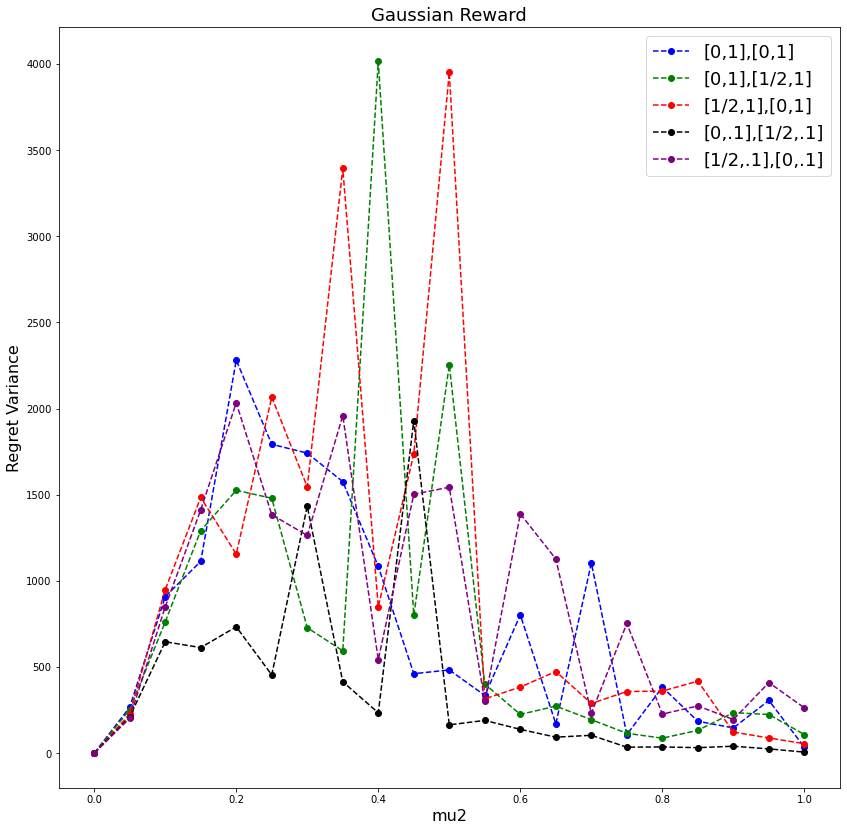

In [104]:
fig, ax = plt.subplots()
fig.set_figheight(14)
fig.set_figwidth(14)
plt.plot(mu2_fast,tsG1['var'],"--bo",color='blue')
plt.plot(mu2_fast,tsG2['var'],"--bo",color='green')
plt.plot(mu2_fast,tsG3['var'],"--bo",color='red')
plt.plot(mu2_fast,tsG4['var'],"--bo",color='black')
plt.plot(mu2_fast,tsG5['var'],"--bo",color='purple')
#plt.plot(mu2,df33['point'],"--bo",color='red')
#plt.plot(sim44['mu1'],sim44['regret'],"--bo",color='black')

ax.set_title("Gaussian Reward",fontsize=18)
ax.set_xlabel('mu2', fontsize=16)
ax.set_ylabel('Regret Variance', fontsize=16)
plt.legend(['[0,1],[0,1]', '[0,1],[1/2,1]','[1/2,1],[0,1]','[0,.1],[1/2,.1]','[1/2,.1],[0,.1]'],prop={'size': 18})
#ax.tick_params(axis='both', which='major', labelsize=16)

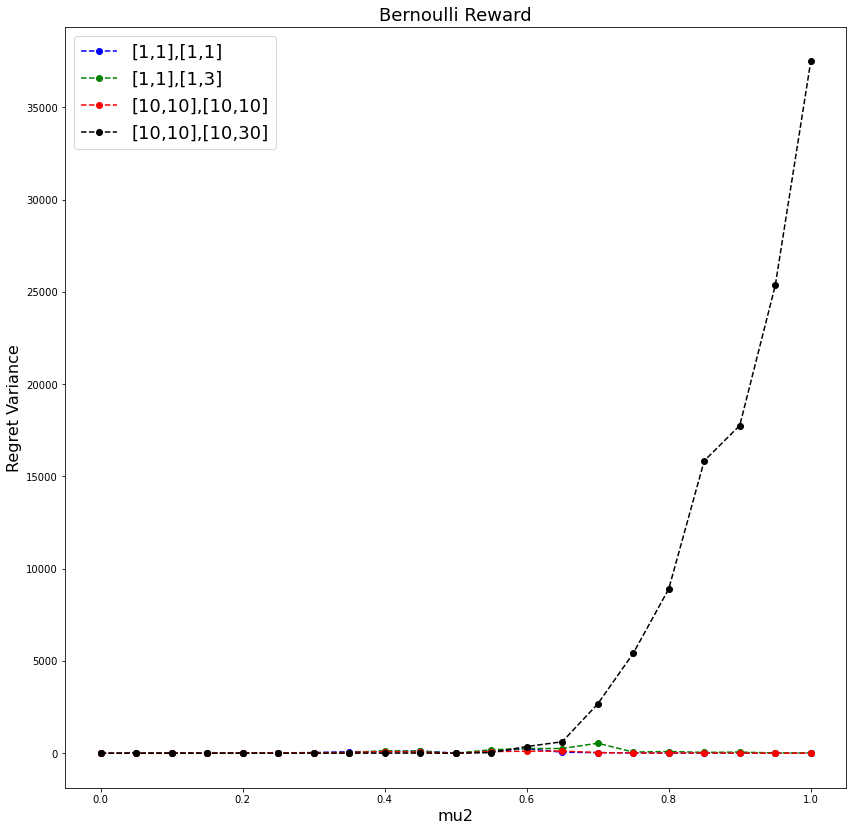

In [105]:
fig, ax = plt.subplots()
fig.set_figheight(14)
fig.set_figwidth(14)
plt.plot(mu2_fast,tsB1['var'],"--bo",color='blue')
plt.plot(mu2_fast,tsB2['var'],"--bo",color='green')
plt.plot(mu2_fast,tsB3['var'],"--bo",color='red')
plt.plot(mu2_fast,tsB4['var'],"--bo",color='black')
#plt.plot(mu2_fast,tsG5['regret'],"--bo",color='purple')
#plt.plot(mu2,df33['point'],"--bo",color='red')
#plt.plot(sim44['mu1'],sim44['regret'],"--bo",color='black')

ax.set_title("Bernoulli Reward",fontsize=18)
ax.set_xlabel('mu2', fontsize=16)
ax.set_ylabel('Regret Variance', fontsize=16)
plt.legend(['[1,1],[1,1]', '[1,1],[1,3]','[10,10],[10,10]','[10,10],[10,30]'],prop={'size': 18})
#ax.tick_params(axis='both', which='major', labelsize=16)

In [100]:
def calculate_regret(n,opt_mu,mus):
    rn = n*opt_mu - sum(mus)
    
def calculate_posterior_value_gaussian(x,sigma,mup,sigmap,n):
    # x is the observed sample mean
    # sigma is the signal std
    # mup is the mean of the prior
    # sigmap is the std of the prior
    # n is the number of simulated values to get
    mean = ((mup / (sigmap)) + (np.mean(x)/(sigma))) / ((1/(sigmap)) + (1/(sigma)))
    std = ((1/(sigmap)) + (1/(sigma)))**(-1)
    #std = 1/((1/(sigmap)**2) + n)
    #mean = std*sum(x)
    return [mean,std]

    
def thompson_sampling_gaussian(n,mu2,p1,p2):
    # n is the horizon (number of iterations)
    # mu2 is the true mean of bandit 2
    # p1 is the prior distribution for bandit 1
    # p2 is the prior distriubtion for bandit 2
    t = 1
    regret = 0
    rewards1 = []
    rewards2 = []
    visits = [0,0]
    dist1 = p1
    dist2 = p2
    if mu2 > 0: 
        opt_mu = mu2
    else:
        opt_mu = 0
    
    while(t < n):
        
        # Sampling v_{t}
        sim1 = np.random.normal(dist1[0],dist1[1]**(1/2))
        sim2 = np.random.normal(dist2[0],dist2[1]**(1/2))

        # Choosing At
        arm = np.argmax([sim1,sim2])
        
        # pull reward and update distribution
        if arm == 0: # Choose arm 1
            reward = pullGaussian(0)
            rewards1 += [reward]
            regret += abs((opt_mu - 0))
            visits[0] += 1
            dist1 = calculate_posterior_value_gaussian(rewards1,1,dist1[0],dist1[1],visits[0])
        else: # Choose arm 2
            reward = pullGaussian(mu2)
            rewards2 += [reward]
            regret += abs(opt_mu-mu2)
            visits[1] += 1
            #print(dist2)
            dist2 = calculate_posterior_value_gaussian(rewards2,1,dist2[0],dist2[1],visits[1])
        t += 1
    return regret

def calculate_posterior_value_bernoulli(boo,alpha,beta):
    # x is the observed sample mean
    # sigma is the signal std
    # mup is the mean of the prior
    # sigmap is the std of the prior
    # n is the number of simulated values to get
    return [alpha+boo,beta+1-boo]

def pullBernoulli(p):
        return np.random.binomial(1,p)
    
def thompson_sampling_bernoulli(n,mu2,p1,p2):
    # n is the horizon (number of iterations)
    # mu2 is the true mean of bandit 2
    # p1 is the prior distribution for bandit 1
    # p2 is the prior distriubtion for bandit 2
    t = 1
    regret = 0
    dist1 = p1
    dist2 = p2
    rewards1 = []
    rewards2 = []
    visits = [0,0]
    if mu2 > 0.5: 
        opt_mu = mu2
    else:
        opt_mu = 0.5
    
    while(t < n):
        
        # Sampling v_{t}
        sim1 = np.random.beta(dist1[0],dist1[1])
        sim2 = np.random.beta(dist2[0],dist2[1])

        # Choosing At
        arm = np.argmax([sim1,sim2])
        
        
        # pull reward and update distribution
        if arm == 0: # Choose arm 1
            reward = pullBernoulli(0.5)
            regret += abs((opt_mu - 0.5))
            rewards1 += [reward]
            dist1 = calculate_posterior_value_bernoulli(reward,dist1[0],dist1[1])
        else: # Choose arm 2
            reward = pullBernoulli(mu2)
            regret += abs(opt_mu-mu2)
            rewards2 += [reward]
            dist2 = calculate_posterior_value_bernoulli(reward,dist2[0],dist2[1])
        t += 1
    return regret

# Linear Bandits

In [71]:
def UCB_Linear(a,n,theta,lamb=0.1):
    delta = 1/n
    mu_hat = 0
    theta_hat = 0
    ti = [0,0]
    rewards1 = []
    rewards2 = []
    t = 1
    regret = 0
    V = lamb
    at = [a[0]*theta,a[1]*theta]
    optimal = a[np.argmax(at)]
    while(t < n): 
        beta = np.sqrt(lamb) + np.sqrt(2*np.log(1/delta) + np.log((1+(t-1))/delta))
        a_hat = [0,0]
        for i in range(2):
            a_hat[i] = a[i]*theta_hat + beta*np.sqrt(a[i]**(2)/lamb)
        argmax = np.argmax(a_hat)
        reward = theta*a[argmax] + np.random.normal(0,1)
        V = V + a[argmax]**2
        
        mu_hat = mu_hat + reward*a[argmax]
        theta_hat = mu_hat / V
        ti[argmax] += 1
        t+=1
        regret_t = 0 if a[argmax] == optimal else (optimal-a[argmax])*theta
        regret+= regret_t
    
    return regret

def simulationN_LinUCB(a,theta,n=1000,num_sim=1000):
    point_lst = []
    var_lst = []
    df = pd.DataFrame()
    for t in tqdm(theta):
        simulation = [UCB_Linear(a,n,t) for b in range(num_sim)]
        point = np.mean(simulation)
        var = np.var(simulation)
        print(point)
        point_lst += [point]
        var_lst += [var]
    df['point'] = point_lst
    df['var'] = var_lst
    return df

def simulationN_TSLin(a,theta,n=1000,num_sim=1000):
    point_lst = []
    var_lst = []
    df = pd.DataFrame()
    for t in tqdm(theta):
        simulation = [thompsonSampling_linear(a,n,t) for b in range(num_sim)]
        point = np.mean(simulation)
        var = np.var(simulation)
        print(point)
        point_lst += [point]
        var_lst += [var]
    df['point'] = point_lst
    df['var'] = var_lst
    return df

def thompsonSampling_linear(a,n,theta):
    mu_t = 0
    sigma_t = 1
    regret = 0
    at = [a[0]*theta,a[1]*theta]
    optimal = a[np.argmax(at)]
    choose = [0,0]
    #print(optimal)
    
    for i in range(n):
        theta_hat = np.random.normal(mu_t, sigma_t)
        #print(theta_hat)
        X_t = [a[0]*theta_hat,a[1]*theta_hat]
        action = np.argmax(X_t)
        #print([action])
        #print(optimal)
        regret_t = 0 if a[action] == optimal else (optimal-a[action])*theta
        #print(regret_t)
        regret += regret_t
        choose[action]+=1
        
        reward = theta*a[action] + np.random.normal(0,1) # noise
        sigma_t1 = sigma_t / ((X_t[action]**(2))*sigma_t + 1)
        mu_t1 = sigma_t1*(mu_t/sigma_t + X_t[action]*reward)
        mu_t = mu_t1
        sigma_t = sigma_t1
    #print(mu_t)
    #print(sigma_t)
    #print(choose)
    return regret

In [106]:
theta1 = [0.01*x for x in range(-50,51)]

In [107]:
x1 = simulationN_LinUCB([0.1,-0.1],theta1,n=1000,num_sim=100)
x2 = simulationN_LinUCB([0.1,-0.2],theta1,n=1000,num_sim=100)
x3 = simulationN_LinUCB([0.1,0.2],theta1,n=1000,num_sim=100)

  1%|▊                                                                                 | 1/101 [00:02<04:24,  2.64s/it]

16.119000000000018


  2%|█▌                                                                                | 2/101 [00:05<04:28,  2.71s/it]

15.763299999999932


  3%|██▍                                                                               | 3/101 [00:08<04:34,  2.80s/it]

15.253439999999925


  4%|███▏                                                                              | 4/101 [00:10<04:23,  2.71s/it]

17.88444000000002


  5%|████                                                                              | 5/101 [00:13<04:08,  2.59s/it]

19.624519999999876


  6%|████▊                                                                             | 6/101 [00:15<04:10,  2.64s/it]

19.15020000000021


  7%|█████▋                                                                            | 7/101 [00:18<04:06,  2.62s/it]

19.389040000000023


  8%|██████▍                                                                           | 8/101 [00:21<03:59,  2.58s/it]

17.358239999999864


  9%|███████▎                                                                          | 9/101 [00:23<03:56,  2.57s/it]

17.255280000000155


 10%|████████                                                                         | 10/101 [00:26<03:50,  2.53s/it]

17.56194000000007


 11%|████████▊                                                                        | 11/101 [00:28<03:45,  2.50s/it]

16.33919999999983


 12%|█████████▌                                                                       | 12/101 [00:30<03:40,  2.48s/it]

14.64294000000006


 13%|██████████▍                                                                      | 13/101 [00:33<03:36,  2.46s/it]

14.858760000000043


 14%|███████████▏                                                                     | 14/101 [00:35<03:30,  2.42s/it]

15.511879999999964


 15%|████████████                                                                     | 15/101 [00:38<03:26,  2.40s/it]

13.941360000000017


 16%|████████████▊                                                                    | 16/101 [00:40<03:24,  2.40s/it]

17.75690000000004


 17%|█████████████▋                                                                   | 17/101 [00:42<03:18,  2.37s/it]

12.834999999999974


 18%|██████████████▍                                                                  | 18/101 [00:45<03:18,  2.39s/it]

15.83538000000011


 19%|███████████████▏                                                                 | 19/101 [00:47<03:17,  2.41s/it]

20.64704000000001


 20%|████████████████                                                                 | 20/101 [00:50<03:16,  2.43s/it]

17.52057999999993


 21%|████████████████▊                                                                | 21/101 [00:52<03:18,  2.48s/it]

17.367000000000036


 22%|█████████████████▋                                                               | 22/101 [00:55<03:12,  2.44s/it]

16.509699999999956


 23%|██████████████████▍                                                              | 23/101 [00:57<03:11,  2.45s/it]

11.800319999999937


 24%|███████████████████▏                                                             | 24/101 [00:59<03:08,  2.45s/it]

16.132499999999983


 25%|████████████████████                                                             | 25/101 [01:02<03:06,  2.46s/it]

14.98535999999991


 26%|████████████████████▊                                                            | 26/101 [01:04<03:01,  2.42s/it]

15.181000000000006


 27%|█████████████████████▋                                                           | 27/101 [01:07<02:59,  2.43s/it]

15.880799999999901


 28%|██████████████████████▍                                                          | 28/101 [01:09<02:54,  2.39s/it]

12.946239999999909


 29%|███████████████████████▎                                                         | 29/101 [01:12<02:54,  2.43s/it]

12.54791999999997


 30%|████████████████████████                                                         | 30/101 [01:14<02:52,  2.43s/it]

12.584880000000128


 31%|████████████████████████▊                                                        | 31/101 [01:16<02:48,  2.41s/it]

15.715999999999795


 32%|█████████████████████████▋                                                       | 32/101 [01:19<02:46,  2.41s/it]

13.494940000000032


 33%|██████████████████████████▍                                                      | 33/101 [01:21<02:46,  2.44s/it]

14.743080000000127


 34%|███████████████████████████▎                                                     | 34/101 [01:24<02:44,  2.46s/it]

10.451259999999959


 35%|████████████████████████████                                                     | 35/101 [01:26<02:42,  2.47s/it]

12.459200000000008


 36%|████████████████████████████▊                                                    | 36/101 [01:29<02:38,  2.43s/it]

9.855900000000032


 37%|█████████████████████████████▋                                                   | 37/101 [01:31<02:35,  2.43s/it]

11.504079999999906


 38%|██████████████████████████████▍                                                  | 38/101 [01:33<02:33,  2.44s/it]

11.190919999999931


 39%|███████████████████████████████▎                                                 | 39/101 [01:36<02:32,  2.46s/it]

11.021759999999942


 40%|████████████████████████████████                                                 | 40/101 [01:38<02:28,  2.44s/it]

9.299619999999969


 41%|████████████████████████████████▉                                                | 41/101 [01:41<02:26,  2.44s/it]

8.36759999999989


 42%|█████████████████████████████████▋                                               | 42/101 [01:43<02:26,  2.48s/it]

6.86232000000005


 43%|██████████████████████████████████▍                                              | 43/101 [01:46<02:21,  2.44s/it]

7.510560000000005


 44%|███████████████████████████████████▎                                             | 44/101 [01:48<02:18,  2.43s/it]

5.415339999999962


 45%|████████████████████████████████████                                             | 45/101 [01:51<02:16,  2.44s/it]

5.167679999999977


 46%|████████████████████████████████████▉                                            | 46/101 [01:53<02:14,  2.45s/it]

4.356999999999942


 47%|█████████████████████████████████████▋                                           | 47/101 [01:55<02:10,  2.41s/it]

3.691040000000003


 48%|██████████████████████████████████████▍                                          | 48/101 [01:58<02:07,  2.41s/it]

2.607599999999984


 49%|███████████████████████████████████████▎                                         | 49/101 [02:00<02:06,  2.43s/it]

1.9163600000000014


 50%|████████████████████████████████████████                                         | 50/101 [02:03<02:02,  2.40s/it]

0.9773400000000007


 50%|████████████████████████████████████████▉                                        | 51/101 [02:05<02:00,  2.41s/it]

0.0


 51%|█████████████████████████████████████████▋                                       | 52/101 [02:08<02:00,  2.45s/it]

0.9234200000000007


 52%|██████████████████████████████████████████▌                                      | 53/101 [02:10<01:58,  2.48s/it]

2.010480000000001


 53%|███████████████████████████████████████████▎                                     | 54/101 [02:13<01:56,  2.47s/it]

2.699099999999985


 54%|████████████████████████████████████████████                                     | 55/101 [02:15<01:52,  2.45s/it]

4.182000000000002


 55%|████████████████████████████████████████████▉                                    | 56/101 [02:17<01:50,  2.46s/it]

4.380799999999941


 56%|█████████████████████████████████████████████▋                                   | 57/101 [02:20<01:46,  2.41s/it]

4.969319999999971


 57%|██████████████████████████████████████████████▌                                  | 58/101 [02:22<01:46,  2.48s/it]

5.670839999999954


 58%|███████████████████████████████████████████████▎                                 | 59/101 [02:25<01:43,  2.46s/it]

7.151040000000005


 59%|████████████████████████████████████████████████                                 | 60/101 [02:27<01:40,  2.44s/it]

7.005600000000047


 60%|████████████████████████████████████████████████▉                                | 61/101 [02:30<01:40,  2.51s/it]

8.76659999999988


 61%|█████████████████████████████████████████████████▋                               | 62/101 [02:32<01:35,  2.44s/it]

10.583319999999967


 62%|██████████████████████████████████████████████████▌                              | 63/101 [02:35<01:33,  2.45s/it]

10.787279999999937


 63%|███████████████████████████████████████████████████▎                             | 64/101 [02:37<01:31,  2.47s/it]

11.612639999999926


 64%|████████████████████████████████████████████████████▏                            | 65/101 [02:40<01:27,  2.44s/it]

10.994479999999927


 65%|████████████████████████████████████████████████████▉                            | 66/101 [02:42<01:26,  2.46s/it]

11.89320000000005


 66%|█████████████████████████████████████████████████████▋                           | 67/101 [02:45<01:23,  2.47s/it]

9.683840000000005


 67%|██████████████████████████████████████████████████████▌                          | 68/101 [02:47<01:20,  2.43s/it]

13.742119999999913


 68%|███████████████████████████████████████████████████████▎                         | 69/101 [02:49<01:17,  2.43s/it]

12.66912000000007


 69%|████████████████████████████████████████████████████████▏                        | 70/101 [02:52<01:16,  2.46s/it]

12.141380000000035


 70%|████████████████████████████████████████████████████████▉                        | 71/101 [02:54<01:13,  2.45s/it]

16.15599999999979


 71%|█████████████████████████████████████████████████████████▋                       | 72/101 [02:57<01:10,  2.42s/it]

13.075860000000162


 72%|██████████████████████████████████████████████████████████▌                      | 73/101 [02:59<01:07,  2.43s/it]

14.179879999999974


 73%|███████████████████████████████████████████████████████████▎                     | 74/101 [03:01<01:04,  2.40s/it]

14.562219999999881


 74%|████████████████████████████████████████████████████████████▏                    | 75/101 [03:04<01:02,  2.42s/it]

14.72831999999993


 75%|████████████████████████████████████████████████████████████▉                    | 76/101 [03:06<00:59,  2.39s/it]

14.205999999999992


 76%|█████████████████████████████████████████████████████████████▊                   | 77/101 [03:09<00:57,  2.41s/it]

16.2941999999999


 77%|██████████████████████████████████████████████████████████████▌                  | 78/101 [03:11<00:55,  2.41s/it]

11.817359999999978


 78%|███████████████████████████████████████████████████████████████▎                 | 79/101 [03:14<00:53,  2.43s/it]

16.02887999999991


 79%|████████████████████████████████████████████████████████████████▏                | 80/101 [03:16<00:50,  2.41s/it]

13.452519999999963


 80%|████████████████████████████████████████████████████████████████▉                | 81/101 [03:18<00:48,  2.42s/it]

16.56840000000004


 81%|█████████████████████████████████████████████████████████████████▊               | 82/101 [03:21<00:46,  2.43s/it]

20.4351999999999


 82%|██████████████████████████████████████████████████████████████████▌              | 83/101 [03:23<00:44,  2.45s/it]

17.418880000000012


 83%|███████████████████████████████████████████████████████████████████▎             | 84/101 [03:26<00:41,  2.46s/it]

14.26722000000008


 84%|████████████████████████████████████████████████████████████████████▏            | 85/101 [03:28<00:38,  2.41s/it]

16.07723999999995


 85%|████████████████████████████████████████████████████████████████████▉            | 86/101 [03:31<00:36,  2.43s/it]

15.288000000000038


 86%|█████████████████████████████████████████████████████████████████████▊           | 87/101 [03:33<00:33,  2.40s/it]

14.021280000000042


 87%|██████████████████████████████████████████████████████████████████████▌          | 88/101 [03:35<00:31,  2.43s/it]

15.328359999999952


 88%|███████████████████████████████████████████████████████████████████████▍         | 89/101 [03:38<00:28,  2.38s/it]

17.338640000000023


 89%|████████████████████████████████████████████████████████████████████████▏        | 90/101 [03:40<00:26,  2.39s/it]

20.063940000000162


 90%|████████████████████████████████████████████████████████████████████████▉        | 91/101 [03:42<00:23,  2.37s/it]

11.543199999999914


 91%|█████████████████████████████████████████████████████████████████████████▊       | 92/101 [03:45<00:21,  2.40s/it]

16.52054000000006


 92%|██████████████████████████████████████████████████████████████████████████▌      | 93/101 [03:47<00:18,  2.37s/it]

14.35896000000007


 93%|███████████████████████████████████████████████████████████████████████████▍     | 94/101 [03:50<00:16,  2.40s/it]

18.207059999999856


 94%|████████████████████████████████████████████████████████████████████████████▏    | 95/101 [03:52<00:14,  2.49s/it]

17.68448000000003


 95%|████████████████████████████████████████████████████████████████████████████▉    | 96/101 [03:55<00:12,  2.48s/it]

15.204600000000147


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 97/101 [03:58<00:10,  2.64s/it]

18.65299999999987


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 98/101 [04:00<00:07,  2.61s/it]

22.011980000000005


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 99/101 [04:04<00:05,  2.87s/it]

20.95775999999988


 99%|███████████████████████████████████████████████████████████████████████████████▏| 100/101 [04:07<00:03,  3.07s/it]

18.902239999999914


100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [04:10<00:00,  2.48s/it]


15.826999999999998


  1%|▊                                                                                 | 1/101 [00:02<04:13,  2.54s/it]

0.0


  2%|█▌                                                                                | 2/101 [00:05<04:13,  2.56s/it]

0.0


  3%|██▍                                                                               | 3/101 [00:08<04:48,  2.95s/it]

0.0


  4%|███▏                                                                              | 4/101 [00:12<05:08,  3.19s/it]

0.0


  5%|████                                                                              | 5/101 [00:15<05:17,  3.31s/it]

0.0


  6%|████▊                                                                             | 6/101 [00:18<05:00,  3.16s/it]

0.0


  7%|█████▋                                                                            | 7/101 [00:21<04:40,  2.99s/it]

0.0


  8%|██████▍                                                                           | 8/101 [00:23<04:21,  2.81s/it]

0.0


  9%|███████▎                                                                          | 9/101 [00:25<04:07,  2.69s/it]

0.0


 10%|████████                                                                         | 10/101 [00:28<03:58,  2.62s/it]

0.0


 11%|████████▊                                                                        | 11/101 [00:30<03:51,  2.57s/it]

0.0


 12%|█████████▌                                                                       | 12/101 [00:33<03:47,  2.55s/it]

0.0


 13%|██████████▍                                                                      | 13/101 [00:36<03:49,  2.61s/it]

0.0


 14%|███████████▏                                                                     | 14/101 [00:38<03:42,  2.56s/it]

0.0


 15%|████████████                                                                     | 15/101 [00:41<03:36,  2.52s/it]

0.0


 16%|████████████▊                                                                    | 16/101 [00:43<03:33,  2.51s/it]

0.0


 17%|█████████████▋                                                                   | 17/101 [00:46<03:31,  2.51s/it]

0.0


 18%|██████████████▍                                                                  | 18/101 [00:48<03:27,  2.50s/it]

0.0


 19%|███████████████▏                                                                 | 19/101 [00:50<03:23,  2.48s/it]

0.0


 20%|████████████████                                                                 | 20/101 [00:53<03:19,  2.46s/it]

0.0


 21%|████████████████▊                                                                | 21/101 [00:55<03:14,  2.44s/it]

0.0


 22%|█████████████████▋                                                               | 22/101 [00:58<03:13,  2.44s/it]

0.0


 23%|██████████████████▍                                                              | 23/101 [01:00<03:15,  2.50s/it]

0.0


 24%|███████████████████▏                                                             | 24/101 [01:03<03:21,  2.62s/it]

0.0


 25%|████████████████████                                                             | 25/101 [01:06<03:19,  2.63s/it]

0.0


 26%|████████████████████▊                                                            | 26/101 [01:08<03:15,  2.60s/it]

0.0007500000000000001


 27%|█████████████████████▋                                                           | 27/101 [01:11<03:20,  2.71s/it]

0.0


 28%|██████████████████████▍                                                          | 28/101 [01:14<03:14,  2.66s/it]

0.0


 29%|███████████████████████▎                                                         | 29/101 [01:17<03:11,  2.66s/it]

0.0


 30%|████████████████████████                                                         | 30/101 [01:19<03:02,  2.57s/it]

0.0


 31%|████████████████████████▊                                                        | 31/101 [01:22<03:01,  2.59s/it]

0.0


 32%|█████████████████████████▋                                                       | 32/101 [01:24<03:00,  2.62s/it]

0.0


 33%|██████████████████████████▍                                                      | 33/101 [01:27<02:55,  2.59s/it]

0.0


 34%|███████████████████████████▎                                                     | 34/101 [01:30<02:56,  2.64s/it]

0.0


 35%|████████████████████████████                                                     | 35/101 [01:32<02:48,  2.55s/it]

0.0


 36%|████████████████████████████▊                                                    | 36/101 [01:35<02:48,  2.59s/it]

0.0


 37%|█████████████████████████████▋                                                   | 37/101 [01:37<02:41,  2.52s/it]

0.0


 38%|██████████████████████████████▍                                                  | 38/101 [01:40<02:41,  2.56s/it]

0.0


 39%|███████████████████████████████▎                                                 | 39/101 [01:42<02:40,  2.59s/it]

0.0


 40%|████████████████████████████████                                                 | 40/101 [01:45<02:32,  2.50s/it]

0.0


 41%|████████████████████████████████▉                                                | 41/101 [01:47<02:30,  2.50s/it]

0.0


 42%|█████████████████████████████████▋                                               | 42/101 [01:50<02:33,  2.60s/it]

0.0


 43%|██████████████████████████████████▍                                              | 43/101 [01:52<02:28,  2.56s/it]

0.0


 44%|███████████████████████████████████▎                                             | 44/101 [01:55<02:27,  2.59s/it]

0.0


 45%|████████████████████████████████████                                             | 45/101 [01:58<02:26,  2.62s/it]

0.0


 46%|████████████████████████████████████▉                                            | 46/101 [02:00<02:25,  2.64s/it]

0.0


 47%|█████████████████████████████████████▋                                           | 47/101 [02:03<02:20,  2.59s/it]

0.00036


 48%|██████████████████████████████████████▍                                          | 48/101 [02:05<02:17,  2.60s/it]

0.0


 49%|███████████████████████████████████████▎                                         | 49/101 [02:08<02:14,  2.59s/it]

0.0


 50%|████████████████████████████████████████                                         | 50/101 [02:11<02:12,  2.60s/it]

0.0


 50%|████████████████████████████████████████▉                                        | 51/101 [02:13<02:06,  2.53s/it]

0.0


 51%|█████████████████████████████████████████▋                                       | 52/101 [02:16<02:03,  2.53s/it]

2.9970000000000034


 52%|██████████████████████████████████████████▌                                      | 53/101 [02:18<02:03,  2.58s/it]

5.994000000000007


 53%|███████████████████████████████████████████▎                                     | 54/101 [02:21<01:59,  2.54s/it]

8.991000000000158


 54%|████████████████████████████████████████████                                     | 55/101 [02:23<01:58,  2.58s/it]

11.988000000000014


 55%|████████████████████████████████████████████▉                                    | 56/101 [02:26<01:54,  2.55s/it]

14.985000000000184


 56%|█████████████████████████████████████████████▋                                   | 57/101 [02:28<01:52,  2.56s/it]

17.982000000000316


 57%|██████████████████████████████████████████████▌                                  | 58/101 [02:31<01:49,  2.54s/it]

20.978580000000463


 58%|███████████████████████████████████████████████▎                                 | 59/101 [02:33<01:46,  2.53s/it]

23.976000000000028


 59%|████████████████████████████████████████████████                                 | 60/101 [02:36<01:44,  2.56s/it]

26.97300000000023


 60%|████████████████████████████████████████████████▉                                | 61/101 [02:39<01:43,  2.58s/it]

29.968800000000364


 61%|█████████████████████████████████████████████████▋                               | 62/101 [02:41<01:42,  2.63s/it]

32.96700000000055


 62%|██████████████████████████████████████████████████▌                              | 63/101 [02:44<01:37,  2.57s/it]

35.96400000000063


 63%|███████████████████████████████████████████████████▎                             | 64/101 [02:46<01:34,  2.54s/it]

38.96100000000079


 64%|████████████████████████████████████████████████████▏                            | 65/101 [02:49<01:29,  2.49s/it]

41.957160000000925


 65%|████████████████████████████████████████████████████▉                            | 66/101 [02:51<01:28,  2.54s/it]

44.955000000001064


 66%|█████████████████████████████████████████████████████▋                           | 67/101 [02:54<01:28,  2.61s/it]

47.952000000000055


 67%|██████████████████████████████████████████████████████▌                          | 68/101 [02:57<01:26,  2.62s/it]

50.94900000000026


 68%|███████████████████████████████████████████████████████▎                         | 69/101 [03:00<01:25,  2.67s/it]

53.94600000000046


 69%|████████████████████████████████████████████████████████▏                        | 70/101 [03:02<01:21,  2.61s/it]

56.94300000000062


 70%|████████████████████████████████████████████████████████▉                        | 71/101 [03:05<01:24,  2.83s/it]

59.94000000000074


 71%|█████████████████████████████████████████████████████████▋                       | 72/101 [03:08<01:18,  2.72s/it]

62.93700000000093


 72%|██████████████████████████████████████████████████████████▌                      | 73/101 [03:11<01:18,  2.80s/it]

65.9340000000011


 73%|███████████████████████████████████████████████████████████▎                     | 74/101 [03:14<01:16,  2.82s/it]

68.93100000000129


 74%|████████████████████████████████████████████████████████████▏                    | 75/101 [03:16<01:11,  2.75s/it]

71.92800000000126


 75%|████████████████████████████████████████████████████████████▉                    | 76/101 [03:19<01:09,  2.76s/it]

74.9250000000014


 76%|█████████████████████████████████████████████████████████████▊                   | 77/101 [03:22<01:05,  2.72s/it]

77.92200000000157


 77%|██████████████████████████████████████████████████████████████▌                  | 78/101 [03:24<01:01,  2.68s/it]

80.91900000000172


 78%|███████████████████████████████████████████████████████████████▎                 | 79/101 [03:27<00:57,  2.63s/it]

83.91600000000184


 79%|████████████████████████████████████████████████████████████████▏                | 80/101 [03:29<00:55,  2.64s/it]

86.91300000000203


 80%|████████████████████████████████████████████████████████████████▉                | 81/101 [03:32<00:51,  2.60s/it]

89.90460000000213


 81%|█████████████████████████████████████████████████████████████████▊               | 82/101 [03:34<00:48,  2.54s/it]

92.90700000000231


 82%|██████████████████████████████████████████████████████████████████▌              | 83/101 [03:37<00:45,  2.54s/it]

95.9001600000001


 83%|███████████████████████████████████████████████████████████████████▎             | 84/101 [03:40<00:43,  2.58s/it]

98.90100000000028


 84%|████████████████████████████████████████████████████████████████████▏            | 85/101 [03:42<00:42,  2.66s/it]

101.89596000000053


 85%|████████████████████████████████████████████████████████████████████▉            | 86/101 [03:45<00:38,  2.59s/it]

104.89500000000068


 86%|█████████████████████████████████████████████████████████████████████▊           | 87/101 [03:48<00:36,  2.62s/it]

107.89200000000092


 87%|██████████████████████████████████████████████████████████████████████▌          | 88/101 [03:50<00:34,  2.67s/it]

110.88900000000105


 88%|███████████████████████████████████████████████████████████████████████▍         | 89/101 [03:53<00:32,  2.73s/it]

113.88600000000125


 89%|████████████████████████████████████████████████████████████████████████▏        | 90/101 [03:56<00:29,  2.64s/it]

116.88300000000143


 90%|████████████████████████████████████████████████████████████████████████▉        | 91/101 [03:58<00:25,  2.58s/it]

119.88000000000147


 91%|█████████████████████████████████████████████████████████████████████████▊       | 92/101 [04:01<00:23,  2.57s/it]

122.87700000000173


 92%|██████████████████████████████████████████████████████████████████████████▌      | 93/101 [04:03<00:20,  2.56s/it]

125.87400000000186


 93%|███████████████████████████████████████████████████████████████████████████▍     | 94/101 [04:06<00:18,  2.58s/it]

128.87100000000197


 94%|████████████████████████████████████████████████████████████████████████████▏    | 95/101 [04:08<00:15,  2.58s/it]

131.8680000000022


 95%|████████████████████████████████████████████████████████████████████████████▉    | 96/101 [04:11<00:13,  2.62s/it]

134.86500000000163


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 97/101 [04:14<00:10,  2.59s/it]

137.86200000000258


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 98/101 [04:17<00:08,  2.69s/it]

140.8590000000015


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 99/101 [04:19<00:05,  2.64s/it]

143.85600000000252


 99%|███████████████████████████████████████████████████████████████████████████████▏| 100/101 [04:22<00:02,  2.59s/it]

146.8530000000008


100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [04:24<00:00,  2.62s/it]


149.8500000000028


  1%|▊                                                                                 | 1/101 [00:02<04:23,  2.63s/it]

49.94999999999928


  2%|█▌                                                                                | 2/101 [00:05<04:26,  2.70s/it]

48.950999999999624


  3%|██▍                                                                               | 3/101 [00:08<04:29,  2.75s/it]

47.952000000000055


  4%|███▏                                                                              | 4/101 [00:10<04:20,  2.68s/it]

46.95299999999935


  5%|████                                                                              | 5/101 [00:13<04:14,  2.65s/it]

45.95399999999952


  6%|████▊                                                                             | 6/101 [00:15<04:07,  2.60s/it]

44.955000000001064


  7%|█████▋                                                                            | 7/101 [00:18<04:08,  2.65s/it]

43.955999999999385


  8%|██████▍                                                                           | 8/101 [00:21<04:02,  2.61s/it]

42.95699999999942


  9%|███████▎                                                                          | 9/101 [00:23<03:51,  2.51s/it]

41.95800000000092


 10%|████████                                                                         | 10/101 [00:26<03:50,  2.54s/it]

40.95899999999954


 11%|████████▊                                                                        | 11/101 [00:28<03:45,  2.50s/it]

39.959999999999326


 12%|█████████▌                                                                       | 12/101 [00:31<03:44,  2.53s/it]

38.96100000000079


 13%|██████████▍                                                                      | 13/101 [00:33<03:39,  2.50s/it]

37.96199999999965


 14%|███████████▏                                                                     | 14/101 [00:36<03:39,  2.52s/it]

36.962999999999624


 15%|████████████                                                                     | 15/101 [00:38<03:36,  2.51s/it]

35.96400000000063


 16%|████████████▊                                                                    | 16/101 [00:41<03:36,  2.55s/it]

34.96499999999982


 17%|█████████████▋                                                                   | 17/101 [00:43<03:29,  2.49s/it]

33.96599999999955


 18%|██████████████▍                                                                  | 18/101 [00:46<03:31,  2.55s/it]

32.96700000000055


 19%|███████████████▏                                                                 | 19/101 [00:49<03:36,  2.64s/it]

31.968000000000014


 20%|████████████████                                                                 | 20/101 [00:51<03:35,  2.66s/it]

30.968999999999546


 21%|████████████████▊                                                                | 21/101 [00:54<03:34,  2.68s/it]

29.97000000000037


 22%|█████████████████▋                                                               | 22/101 [00:56<03:24,  2.59s/it]

28.97099999999991


 23%|██████████████████▍                                                              | 23/101 [00:59<03:27,  2.66s/it]

27.97199999999951


 24%|███████████████████▏                                                             | 24/101 [01:02<03:22,  2.64s/it]

26.97300000000023


 25%|████████████████████                                                             | 25/101 [01:05<03:25,  2.71s/it]

25.973999999999815


 26%|████████████████████▊                                                            | 26/101 [01:07<03:22,  2.70s/it]

24.97499999999964


 27%|█████████████████████▋                                                           | 27/101 [01:10<03:22,  2.73s/it]

23.976000000000028


 28%|██████████████████████▍                                                          | 28/101 [01:13<03:22,  2.78s/it]

22.97699999999976


 29%|███████████████████████▎                                                         | 29/101 [01:16<03:16,  2.73s/it]

21.977999999999692


 30%|████████████████████████                                                         | 30/101 [01:18<03:09,  2.67s/it]

20.97900000000046


 31%|████████████████████████▊                                                        | 31/101 [01:21<03:19,  2.85s/it]

19.979999999999663


 32%|█████████████████████████▋                                                       | 32/101 [01:24<03:20,  2.91s/it]

18.980999999999824


 33%|██████████████████████████▍                                                      | 33/101 [01:27<03:13,  2.84s/it]

17.982000000000316


 34%|███████████████████████████▎                                                     | 34/101 [01:30<03:12,  2.87s/it]

16.982999999999777


 35%|████████████████████████████                                                     | 35/101 [01:33<03:09,  2.87s/it]

15.984000000000007


 36%|████████████████████████████▊                                                    | 36/101 [01:35<02:56,  2.71s/it]

14.985000000000184


 37%|█████████████████████████████▋                                                   | 37/101 [01:38<02:52,  2.70s/it]

13.985999999999756


 38%|██████████████████████████████▍                                                  | 38/101 [01:41<03:02,  2.89s/it]

12.986999999999908


 39%|███████████████████████████████▎                                                 | 39/101 [01:45<03:09,  3.06s/it]

11.988000000000014


 40%|████████████████████████████████                                                 | 40/101 [01:47<02:59,  2.95s/it]

10.988999999999846


 41%|████████████████████████████████▉                                                | 41/101 [01:50<02:57,  2.96s/it]

9.989999999999831


 42%|█████████████████████████████████▋                                               | 42/101 [01:53<02:44,  2.78s/it]

8.991000000000158


 43%|██████████████████████████████████▍                                              | 43/101 [01:56<02:42,  2.80s/it]

7.9920000000000035


 44%|███████████████████████████████████▎                                             | 44/101 [01:58<02:38,  2.79s/it]

6.992999999999878


 45%|████████████████████████████████████                                             | 45/101 [02:01<02:34,  2.75s/it]

5.994000000000007


 46%|████████████████████████████████████▉                                            | 46/101 [02:04<02:35,  2.82s/it]

4.994999999999916


 47%|█████████████████████████████████████▋                                           | 47/101 [02:07<02:33,  2.84s/it]

3.9960000000000018


 48%|██████████████████████████████████████▍                                          | 48/101 [02:09<02:22,  2.69s/it]

2.9970000000000034


 49%|███████████████████████████████████████▎                                         | 49/101 [02:12<02:19,  2.68s/it]

1.9980000000000009


 50%|████████████████████████████████████████                                         | 50/101 [02:14<02:12,  2.59s/it]

0.9990000000000004


 50%|████████████████████████████████████████▉                                        | 51/101 [02:17<02:09,  2.59s/it]

0.0


 51%|█████████████████████████████████████████▋                                       | 52/101 [02:20<02:07,  2.59s/it]

0.0


 52%|██████████████████████████████████████████▌                                      | 53/101 [02:22<02:05,  2.61s/it]

0.0


 53%|███████████████████████████████████████████▎                                     | 54/101 [02:25<02:00,  2.56s/it]

0.0


 54%|████████████████████████████████████████████                                     | 55/101 [02:27<01:56,  2.53s/it]

0.0


 55%|████████████████████████████████████████████▉                                    | 56/101 [02:30<01:53,  2.52s/it]

0.0


 56%|█████████████████████████████████████████████▋                                   | 57/101 [02:32<01:48,  2.47s/it]

0.0


 57%|██████████████████████████████████████████████▌                                  | 58/101 [02:35<01:49,  2.56s/it]

0.0


 58%|███████████████████████████████████████████████▎                                 | 59/101 [02:37<01:45,  2.52s/it]

0.0


 59%|████████████████████████████████████████████████                                 | 60/101 [02:40<01:53,  2.76s/it]

0.0


 60%|████████████████████████████████████████████████▉                                | 61/101 [02:43<01:46,  2.67s/it]

0.0


 61%|█████████████████████████████████████████████████▋                               | 62/101 [02:46<01:49,  2.81s/it]

0.0


 62%|██████████████████████████████████████████████████▌                              | 63/101 [02:49<01:44,  2.76s/it]

0.0


 63%|███████████████████████████████████████████████████▎                             | 64/101 [02:52<01:44,  2.83s/it]

0.0


 64%|████████████████████████████████████████████████████▏                            | 65/101 [02:54<01:37,  2.71s/it]

0.0


 65%|████████████████████████████████████████████████████▉                            | 66/101 [02:57<01:33,  2.67s/it]

0.0


 66%|█████████████████████████████████████████████████████▋                           | 67/101 [02:59<01:27,  2.57s/it]

0.0


 67%|██████████████████████████████████████████████████████▌                          | 68/101 [03:02<01:24,  2.57s/it]

0.0


 68%|███████████████████████████████████████████████████████▎                         | 69/101 [03:04<01:19,  2.50s/it]

0.0


 69%|████████████████████████████████████████████████████████▏                        | 70/101 [03:06<01:17,  2.49s/it]

0.0


 70%|████████████████████████████████████████████████████████▉                        | 71/101 [03:09<01:15,  2.53s/it]

0.0


 71%|█████████████████████████████████████████████████████████▋                       | 72/101 [03:11<01:11,  2.46s/it]

0.0


 72%|██████████████████████████████████████████████████████████▌                      | 73/101 [03:14<01:07,  2.41s/it]

0.0


 73%|███████████████████████████████████████████████████████████▎                     | 74/101 [03:16<01:06,  2.46s/it]

0.0


 74%|████████████████████████████████████████████████████████████▏                    | 75/101 [03:19<01:03,  2.46s/it]

0.0


 75%|████████████████████████████████████████████████████████████▉                    | 76/101 [03:21<01:00,  2.43s/it]

0.0


 76%|█████████████████████████████████████████████████████████████▊                   | 77/101 [03:24<00:59,  2.50s/it]

0.0


 77%|██████████████████████████████████████████████████████████████▌                  | 78/101 [03:26<00:56,  2.46s/it]

0.0


 78%|███████████████████████████████████████████████████████████████▎                 | 79/101 [03:29<00:54,  2.49s/it]

0.0


 79%|████████████████████████████████████████████████████████████████▏                | 80/101 [03:31<00:51,  2.44s/it]

0.0


 80%|████████████████████████████████████████████████████████████████▉                | 81/101 [03:34<00:50,  2.54s/it]

0.0


 81%|█████████████████████████████████████████████████████████████████▊               | 82/101 [03:36<00:47,  2.48s/it]

0.0


 82%|██████████████████████████████████████████████████████████████████▌              | 83/101 [03:38<00:44,  2.48s/it]

0.0


 83%|███████████████████████████████████████████████████████████████████▎             | 84/101 [03:41<00:42,  2.49s/it]

0.0


 84%|████████████████████████████████████████████████████████████████████▏            | 85/101 [03:43<00:39,  2.46s/it]

0.0


 85%|████████████████████████████████████████████████████████████████████▉            | 86/101 [03:46<00:37,  2.50s/it]

0.0


 86%|█████████████████████████████████████████████████████████████████████▊           | 87/101 [03:49<00:35,  2.53s/it]

0.0


 87%|██████████████████████████████████████████████████████████████████████▌          | 88/101 [03:51<00:33,  2.56s/it]

0.0


 88%|███████████████████████████████████████████████████████████████████████▍         | 89/101 [03:54<00:30,  2.51s/it]

0.0


 89%|████████████████████████████████████████████████████████████████████████▏        | 90/101 [03:56<00:27,  2.50s/it]

0.0


 90%|████████████████████████████████████████████████████████████████████████▉        | 91/101 [03:59<00:25,  2.51s/it]

0.0


 91%|█████████████████████████████████████████████████████████████████████████▊       | 92/101 [04:01<00:22,  2.47s/it]

0.0


 92%|██████████████████████████████████████████████████████████████████████████▌      | 93/101 [04:03<00:19,  2.47s/it]

0.0


 93%|███████████████████████████████████████████████████████████████████████████▍     | 94/101 [04:06<00:16,  2.41s/it]

0.0


 94%|████████████████████████████████████████████████████████████████████████████▏    | 95/101 [04:08<00:14,  2.45s/it]

0.0


 95%|████████████████████████████████████████████████████████████████████████████▉    | 96/101 [04:11<00:12,  2.44s/it]

0.0


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 97/101 [04:13<00:09,  2.40s/it]

0.0


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 98/101 [04:15<00:07,  2.38s/it]

0.0


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 99/101 [04:18<00:04,  2.50s/it]

0.0


 99%|███████████████████████████████████████████████████████████████████████████████▏| 100/101 [04:20<00:02,  2.45s/it]

0.0


100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [04:23<00:00,  2.61s/it]

0.0


In [108]:
xx1 = simulationN_TSLin([0.1,-0.1],theta1,n=1000,num_sim=100)
xx2 = simulationN_TSLin([0.1,-0.2],theta1,n=1000,num_sim=100)
xx3 = simulationN_TSLin([0.1,0.2],theta1,n=1000,num_sim=100)

  1%|▊                                                                                 | 1/101 [00:01<03:01,  1.82s/it]

49.094000000000285


  2%|█▌                                                                                | 2/101 [00:03<03:01,  1.83s/it]

51.22655999999968


  3%|██▍                                                                               | 3/101 [00:05<02:58,  1.82s/it]

50.5948799999994


  4%|███▏                                                                              | 4/101 [00:07<02:51,  1.76s/it]

46.15870000000022


  5%|████                                                                              | 5/101 [00:08<02:49,  1.76s/it]

44.60067999999964


  6%|████▊                                                                             | 6/101 [00:10<02:55,  1.85s/it]

45.35280000000054


  7%|█████▋                                                                            | 7/101 [00:12<02:54,  1.86s/it]

42.29544000000016


  8%|██████▍                                                                           | 8/101 [00:14<02:49,  1.82s/it]

44.042319999999556


  9%|███████▎                                                                          | 9/101 [00:16<02:45,  1.80s/it]

40.636680000000325


 10%|████████                                                                         | 10/101 [00:18<02:56,  1.94s/it]

42.17096000000025


 11%|████████▊                                                                        | 11/101 [00:20<02:51,  1.91s/it]

35.90719999999957


 12%|█████████▌                                                                       | 12/101 [00:22<02:44,  1.85s/it]

37.0663800000002


 13%|██████████▍                                                                      | 13/101 [00:24<02:46,  1.89s/it]

36.28240000000014


 14%|███████████▏                                                                     | 14/101 [00:25<02:39,  1.83s/it]

36.706960000000024


 15%|████████████                                                                     | 15/101 [00:27<02:33,  1.79s/it]

36.26784000000011


 16%|████████████▊                                                                    | 16/101 [00:29<02:31,  1.79s/it]

37.603300000000125


 17%|█████████████▋                                                                   | 17/101 [00:30<02:26,  1.74s/it]

34.466479999999954


 18%|██████████████▍                                                                  | 18/101 [00:32<02:24,  1.74s/it]

31.473420000000086


 19%|███████████████▏                                                                 | 19/101 [00:34<02:20,  1.71s/it]

30.334720000000026


 20%|████████████████                                                                 | 20/101 [00:36<02:19,  1.72s/it]

30.589559999999963


 21%|████████████████▊                                                                | 21/101 [00:37<02:19,  1.74s/it]

31.837199999999992


 22%|█████████████████▋                                                               | 22/101 [00:39<02:23,  1.81s/it]

30.476679999999917


 23%|██████████████████▍                                                              | 23/101 [00:41<02:21,  1.81s/it]

27.652239999999956


 24%|███████████████████▏                                                             | 24/101 [00:43<02:17,  1.79s/it]

26.934119999999883


 25%|████████████████████                                                             | 25/101 [00:44<02:12,  1.75s/it]

25.429559999999842


 26%|████████████████████▊                                                            | 26/101 [00:46<02:08,  1.72s/it]

23.777500000000067


 27%|█████████████████████▋                                                           | 27/101 [00:48<02:06,  1.72s/it]

23.20799999999979


 28%|██████████████████████▍                                                          | 28/101 [00:49<02:03,  1.69s/it]

24.546059999999784


 29%|███████████████████████▎                                                         | 29/101 [00:51<02:08,  1.79s/it]

21.981520000000042


 30%|████████████████████████                                                         | 30/101 [00:53<02:04,  1.76s/it]

21.019320000000203


 31%|████████████████████████▊                                                        | 31/101 [00:55<02:02,  1.75s/it]

20.134799999999743


 32%|█████████████████████████▋                                                       | 32/101 [00:57<02:06,  1.83s/it]

19.21432000000008


 33%|██████████████████████████▍                                                      | 33/101 [00:59<02:01,  1.79s/it]

19.396440000000094


 34%|███████████████████████████▎                                                     | 34/101 [01:00<01:58,  1.77s/it]

15.597159999999985


 35%|████████████████████████████                                                     | 35/101 [01:02<01:59,  1.80s/it]

16.317760000000014


 36%|████████████████████████████▊                                                    | 36/101 [01:04<01:56,  1.79s/it]

15.194099999999997


 37%|█████████████████████████████▋                                                   | 37/101 [01:06<01:54,  1.78s/it]

14.752359999999944


 38%|██████████████████████████████▍                                                  | 38/101 [01:07<01:51,  1.77s/it]

12.640419999999917


 39%|███████████████████████████████▎                                                 | 39/101 [01:09<01:52,  1.81s/it]

12.067439999999888


 40%|████████████████████████████████                                                 | 40/101 [01:11<01:49,  1.79s/it]

11.484440000000024


 41%|████████████████████████████████▉                                                | 41/101 [01:13<01:44,  1.75s/it]

9.352599999999883


 42%|█████████████████████████████████▋                                               | 42/101 [01:15<01:45,  1.79s/it]

8.993700000000038


 43%|██████████████████████████████████▍                                              | 43/101 [01:16<01:43,  1.78s/it]

7.375520000000005


 44%|███████████████████████████████████▎                                             | 44/101 [01:18<01:41,  1.78s/it]

7.13957999999996


 45%|████████████████████████████████████                                             | 45/101 [01:20<01:38,  1.75s/it]

6.630119999999944


 46%|████████████████████████████████████▉                                            | 46/101 [01:22<01:39,  1.80s/it]

5.339999999999929


 47%|█████████████████████████████████████▋                                           | 47/101 [01:24<01:37,  1.81s/it]

3.816800000000003


 48%|██████████████████████████████████████▍                                          | 48/101 [01:26<01:38,  1.86s/it]

2.9804999999999744


 49%|███████████████████████████████████████▎                                         | 49/101 [01:28<01:39,  1.91s/it]

1.9994400000000017


 50%|████████████████████████████████████████                                         | 50/101 [01:29<01:35,  1.88s/it]

1.0075200000000009


 50%|████████████████████████████████████████▉                                        | 51/101 [01:32<01:38,  1.97s/it]

0.0


 51%|█████████████████████████████████████████▋                                       | 52/101 [01:33<01:35,  1.94s/it]

1.080940000000001


 52%|██████████████████████████████████████████▌                                      | 53/101 [01:36<01:38,  2.06s/it]

1.8646800000000017


 53%|███████████████████████████████████████████▎                                     | 54/101 [01:38<01:33,  2.00s/it]

3.174839999999979


 54%|████████████████████████████████████████████                                     | 55/101 [01:40<01:33,  2.03s/it]

4.236480000000003


 55%|████████████████████████████████████████████▉                                    | 56/101 [01:42<01:27,  1.95s/it]

4.651499999999942


 56%|█████████████████████████████████████████████▋                                   | 57/101 [01:43<01:23,  1.91s/it]

6.092879999999948


 57%|██████████████████████████████████████████████▌                                  | 58/101 [01:45<01:19,  1.86s/it]

7.301559999999958


 58%|███████████████████████████████████████████████▎                                 | 59/101 [01:47<01:21,  1.94s/it]

8.116800000000007


 59%|████████████████████████████████████████████████                                 | 60/101 [01:49<01:17,  1.90s/it]

9.028980000000068


 60%|████████████████████████████████████████████████▉                                | 61/101 [01:51<01:13,  1.84s/it]

9.959399999999867


 61%|█████████████████████████████████████████████████▋                               | 62/101 [01:53<01:15,  1.93s/it]

11.10230000000002


 62%|██████████████████████████████████████████████████▌                              | 63/101 [01:55<01:13,  1.92s/it]

12.63815999999989


 63%|███████████████████████████████████████████████████▎                             | 64/101 [01:57<01:15,  2.03s/it]

12.96983999999992


 64%|████████████████████████████████████████████████████▏                            | 65/101 [01:59<01:15,  2.09s/it]

14.163239999999915


 65%|████████████████████████████████████████████████████▉                            | 66/101 [02:01<01:11,  2.06s/it]

15.756900000000037


 66%|█████████████████████████████████████████████████████▋                           | 67/101 [02:03<01:07,  2.00s/it]

17.439040000000013


 67%|██████████████████████████████████████████████████████▌                          | 68/101 [02:05<01:04,  1.96s/it]

17.347479999999916


 68%|███████████████████████████████████████████████████████▎                         | 69/101 [02:07<01:00,  1.90s/it]

17.764200000000137


 69%|████████████████████████████████████████████████████████▏                        | 70/101 [02:09<00:57,  1.87s/it]

18.73856000000005


 70%|████████████████████████████████████████████████████████▉                        | 71/101 [02:11<00:58,  1.95s/it]

19.927599999999725


 71%|█████████████████████████████████████████████████████████▋                       | 72/101 [02:12<00:55,  1.90s/it]

20.922720000000265


 72%|██████████████████████████████████████████████████████████▌                      | 73/101 [02:14<00:52,  1.87s/it]

22.819279999999978


 73%|███████████████████████████████████████████████████████████▎                     | 74/101 [02:16<00:49,  1.84s/it]

20.527499999999833


 74%|████████████████████████████████████████████████████████████▏                    | 75/101 [02:18<00:47,  1.83s/it]

22.23167999999984


 75%|████████████████████████████████████████████████████████████▉                    | 76/101 [02:20<00:45,  1.81s/it]

26.18149999999993


 76%|█████████████████████████████████████████████████████████████▊                   | 77/101 [02:22<00:46,  1.92s/it]

24.901759999999843


 77%|██████████████████████████████████████████████████████████████▌                  | 78/101 [02:24<00:43,  1.89s/it]

24.318899999999967


 78%|███████████████████████████████████████████████████████████████▎                 | 79/101 [02:25<00:41,  1.88s/it]

27.854959999999792


 79%|████████████████████████████████████████████████████████████████▏                | 80/101 [02:27<00:39,  1.86s/it]

28.46291999999993


 80%|████████████████████████████████████████████████████████████████▉                | 81/101 [02:29<00:37,  1.85s/it]

28.565400000000096


 81%|█████████████████████████████████████████████████████████████████▊               | 82/101 [02:31<00:34,  1.83s/it]

33.241919999999766


 82%|██████████████████████████████████████████████████████████████████▌              | 83/101 [02:33<00:33,  1.84s/it]

30.744320000000027


 83%|███████████████████████████████████████████████████████████████████▎             | 84/101 [02:35<00:30,  1.82s/it]

33.42240000000027


 84%|████████████████████████████████████████████████████████████████████▏            | 85/101 [02:36<00:28,  1.81s/it]

32.01643999999982


 85%|████████████████████████████████████████████████████████████████████▉            | 86/101 [02:38<00:27,  1.80s/it]

37.50110000000009


 86%|█████████████████████████████████████████████████████████████████████▊           | 87/101 [02:40<00:25,  1.79s/it]

34.28352000000029


 87%|██████████████████████████████████████████████████████████████████████▌          | 88/101 [02:42<00:23,  1.80s/it]

37.03921999999986


 88%|███████████████████████████████████████████████████████████████████████▍         | 89/101 [02:43<00:21,  1.79s/it]

37.26128000000008


 89%|████████████████████████████████████████████████████████████████████████▏        | 90/101 [02:45<00:19,  1.81s/it]

34.44636000000038


 90%|████████████████████████████████████████████████████████████████████████▉        | 91/101 [02:48<00:19,  1.94s/it]

38.185599999999496


 91%|█████████████████████████████████████████████████████████████████████████▊       | 92/101 [02:49<00:17,  1.92s/it]

40.24805999999999


 92%|██████████████████████████████████████████████████████████████████████████▌      | 93/101 [02:51<00:14,  1.86s/it]

39.38760000000053


 93%|███████████████████████████████████████████████████████████████████████████▍     | 94/101 [02:53<00:12,  1.85s/it]

46.135559999999465


 94%|████████████████████████████████████████████████████████████████████████████▏    | 95/101 [02:55<00:11,  1.86s/it]

38.77807999999989


 95%|████████████████████████████████████████████████████████████████████████████▉    | 96/101 [02:57<00:09,  1.87s/it]

42.2370000000007


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 97/101 [02:59<00:07,  1.84s/it]

45.82703999999958


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 98/101 [03:00<00:05,  1.85s/it]

48.874359999999776


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 99/101 [03:02<00:03,  1.82s/it]

50.95775999999971


 99%|███████████████████████████████████████████████████████████████████████████████▏| 100/101 [03:04<00:01,  1.80s/it]

53.94115999999965


100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [03:06<00:00,  1.84s/it]


48.714999999999776


  1%|▊                                                                                 | 1/101 [00:01<02:57,  1.77s/it]

100.330500000001


  2%|█▌                                                                                | 2/101 [00:03<02:55,  1.77s/it]

91.55895000000062


  3%|██▍                                                                               | 3/101 [00:05<02:53,  1.77s/it]

92.92896000000066


  4%|███▏                                                                              | 4/101 [00:07<02:52,  1.78s/it]

94.83801000000102


  5%|████                                                                              | 5/101 [00:08<02:51,  1.79s/it]

92.21574000000088


  6%|████▊                                                                             | 6/101 [00:10<02:49,  1.79s/it]

88.82055000000074


  7%|█████▋                                                                            | 7/101 [00:12<02:49,  1.81s/it]

84.5037600000005


  8%|██████▍                                                                           | 8/101 [00:14<02:49,  1.82s/it]

82.4568000000004


  9%|███████▎                                                                          | 9/101 [00:16<02:46,  1.81s/it]

83.45736000000038


 10%|████████                                                                         | 10/101 [00:18<02:45,  1.82s/it]

83.20335000000034


 11%|████████▊                                                                        | 11/101 [00:19<02:45,  1.84s/it]

75.51600000000012


 12%|█████████▌                                                                       | 12/101 [00:21<02:44,  1.85s/it]

77.18607000000013


 13%|██████████▍                                                                      | 13/101 [00:23<02:43,  1.86s/it]

71.86446000000002


 14%|███████████▏                                                                     | 14/101 [00:25<02:39,  1.84s/it]

69.76016999999985


 15%|████████████                                                                     | 15/101 [00:27<02:37,  1.83s/it]

67.93631999999977


 16%|████████████▊                                                                    | 16/101 [00:29<02:33,  1.80s/it]

66.58679999999966


 17%|█████████████▋                                                                   | 17/101 [00:30<02:30,  1.79s/it]

64.71797999999959


 18%|██████████████▍                                                                  | 18/101 [00:32<02:28,  1.78s/it]

63.55007999999946


 19%|███████████████▏                                                                 | 19/101 [00:34<02:26,  1.79s/it]

60.17855999999937


 20%|████████████████                                                                 | 20/101 [00:36<02:24,  1.79s/it]

61.57995000000113


 21%|████████████████▊                                                                | 21/101 [00:37<02:23,  1.79s/it]

53.649000000000804


 22%|█████████████████▋                                                               | 22/101 [00:39<02:22,  1.80s/it]

55.20063000000085


 23%|██████████████████▍                                                              | 23/101 [00:41<02:27,  1.90s/it]

53.135880000000746


 24%|███████████████████▏                                                             | 24/101 [00:43<02:30,  1.95s/it]

50.27670000000063


 25%|████████████████████                                                             | 25/101 [00:45<02:25,  1.91s/it]

45.19086000000042


 26%|████████████████████▊                                                            | 26/101 [00:48<02:35,  2.07s/it]

45.5490000000004


 27%|█████████████████████▋                                                           | 27/101 [00:50<02:27,  2.00s/it]

43.15968000000033


 28%|██████████████████████▍                                                          | 28/101 [00:51<02:22,  1.95s/it]

42.540570000000365


 29%|███████████████████████▎                                                         | 29/101 [00:53<02:16,  1.89s/it]

36.682800000000235


 30%|████████████████████████                                                         | 30/101 [00:55<02:12,  1.86s/it]

38.19123000000016


 31%|████████████████████████▊                                                        | 31/101 [00:57<02:10,  1.86s/it]

36.990600000000065


 32%|█████████████████████████▋                                                       | 32/101 [00:59<02:07,  1.84s/it]

34.94043000000003


 33%|██████████████████████████▍                                                      | 33/101 [01:00<02:04,  1.83s/it]

32.239619999999896


 34%|███████████████████████████▎                                                     | 34/101 [01:02<02:01,  1.81s/it]

30.11906999999985


 35%|████████████████████████████                                                     | 35/101 [01:04<01:59,  1.81s/it]

25.823039999999754


 36%|████████████████████████████▊                                                    | 36/101 [01:06<01:55,  1.78s/it]

26.310150000000412


 37%|█████████████████████████████▋                                                   | 37/101 [01:08<01:55,  1.81s/it]

23.986200000000295


 38%|██████████████████████████████▍                                                  | 38/101 [01:09<01:52,  1.79s/it]

21.856380000000218


 39%|███████████████████████████████▎                                                 | 39/101 [01:11<01:50,  1.79s/it]

21.50100000000014


 40%|████████████████████████████████                                                 | 40/101 [01:13<01:48,  1.77s/it]

20.757660000000165


 41%|████████████████████████████████▉                                                | 41/101 [01:15<01:47,  1.78s/it]

16.725300000000026


 42%|█████████████████████████████████▋                                               | 42/101 [01:16<01:45,  1.79s/it]

14.973659999999978


 43%|██████████████████████████████████▍                                              | 43/101 [01:18<01:45,  1.82s/it]

12.805199999999891


 44%|███████████████████████████████████▎                                             | 44/101 [01:20<01:44,  1.83s/it]

10.91769000000014


 45%|████████████████████████████████████                                             | 45/101 [01:22<01:42,  1.83s/it]

10.790820000000078


 46%|████████████████████████████████████▉                                            | 46/101 [01:24<01:40,  1.82s/it]

8.434800000000019


 47%|█████████████████████████████████████▋                                           | 47/101 [01:26<01:36,  1.79s/it]

6.760919999999942


 48%|██████████████████████████████████████▍                                          | 48/101 [01:27<01:36,  1.82s/it]

4.9635000000000336


 49%|███████████████████████████████████████▎                                         | 49/101 [01:29<01:33,  1.81s/it]

3.446279999999972


 50%|████████████████████████████████████████                                         | 50/101 [01:31<01:30,  1.78s/it]

1.6692899999999868


 50%|████████████████████████████████████████▉                                        | 51/101 [01:33<01:28,  1.77s/it]

0.0


 51%|█████████████████████████████████████████▋                                       | 52/101 [01:34<01:26,  1.77s/it]

1.4622299999999888


 52%|██████████████████████████████████████████▌                                      | 53/101 [01:36<01:23,  1.75s/it]

3.2799599999999782


 53%|███████████████████████████████████████████▎                                     | 54/101 [01:38<01:22,  1.76s/it]

4.412430000000023


 54%|████████████████████████████████████████████                                     | 55/101 [01:40<01:27,  1.90s/it]

5.600879999999968


 55%|████████████████████████████████████████████▉                                    | 56/101 [01:42<01:28,  1.97s/it]

7.675200000000019


 56%|█████████████████████████████████████████████▋                                   | 57/101 [01:44<01:27,  1.98s/it]

9.22968000000006


 57%|██████████████████████████████████████████████▌                                  | 58/101 [01:47<01:29,  2.07s/it]

11.09745000000016


 58%|███████████████████████████████████████████████▎                                 | 59/101 [01:49<01:28,  2.10s/it]

13.39439999999991


 59%|████████████████████████████████████████████████                                 | 60/101 [01:51<01:23,  2.03s/it]

14.202539999999992


 60%|████████████████████████████████████████████████▉                                | 61/101 [01:52<01:17,  1.94s/it]

15.933000000000076


 61%|█████████████████████████████████████████████████▋                               | 62/101 [01:54<01:13,  1.90s/it]

17.215110000000138


 62%|██████████████████████████████████████████████████▌                              | 63/101 [01:56<01:14,  1.95s/it]

17.791560000000135


 63%|███████████████████████████████████████████████████▎                             | 64/101 [01:58<01:12,  1.97s/it]

22.29318000000028


 64%|████████████████████████████████████████████████████▏                            | 65/101 [02:00<01:12,  2.00s/it]

22.317960000000298


 65%|████████████████████████████████████████████████████▉                            | 66/101 [02:02<01:07,  1.93s/it]

26.315550000000457


 66%|█████████████████████████████████████████████████████▋                           | 67/101 [02:04<01:05,  1.94s/it]

27.20255999999985


 67%|██████████████████████████████████████████████████████▌                          | 68/101 [02:06<01:06,  2.01s/it]

28.63700999999997


 68%|███████████████████████████████████████████████████████▎                         | 69/101 [02:08<01:02,  1.96s/it]

31.813020000000098


 69%|████████████████████████████████████████████████████████▏                        | 70/101 [02:10<00:58,  1.88s/it]

32.97906000000013


 70%|████████████████████████████████████████████████████████▉                        | 71/101 [02:12<00:57,  1.91s/it]

30.090600000000126


 71%|█████████████████████████████████████████████████████████▋                       | 72/101 [02:13<00:53,  1.85s/it]

31.33368000000025


 72%|██████████████████████████████████████████████████████████▌                      | 73/101 [02:15<00:52,  1.86s/it]

39.40068000000043


 73%|███████████████████████████████████████████████████████████▎                     | 74/101 [02:18<00:53,  1.98s/it]

40.66515000000051


 74%|████████████████████████████████████████████████████████████▏                    | 75/101 [02:20<00:52,  2.03s/it]

43.780320000000465


 75%|████████████████████████████████████████████████████████████▉                    | 76/101 [02:22<00:53,  2.15s/it]

44.43975000000055


 76%|█████████████████████████████████████████████████████████████▊                   | 77/101 [02:24<00:49,  2.08s/it]

43.97796000000056


 77%|██████████████████████████████████████████████████████████████▌                  | 78/101 [02:26<00:48,  2.11s/it]

53.04771000000087


 78%|███████████████████████████████████████████████████████████████▎                 | 79/101 [02:28<00:46,  2.12s/it]

44.293200000000695


 79%|████████████████████████████████████████████████████████████████▏                | 80/101 [02:30<00:42,  2.01s/it]

47.82042000000082


 80%|████████████████████████████████████████████████████████████████▉                | 81/101 [02:32<00:39,  2.00s/it]

58.86630000000117


 81%|█████████████████████████████████████████████████████████████████▊               | 82/101 [02:34<00:37,  1.97s/it]

56.37288000000116


 82%|██████████████████████████████████████████████████████████████████▌              | 83/101 [02:36<00:34,  1.94s/it]

58.468799999999774


 83%|███████████████████████████████████████████████████████████████████▎             | 84/101 [02:38<00:33,  1.99s/it]

58.31891999999989


 84%|████████████████████████████████████████████████████████████████████▏            | 85/101 [02:40<00:30,  1.93s/it]

61.15410000000001


 85%|████████████████████████████████████████████████████████████████████▉            | 86/101 [02:42<00:29,  1.99s/it]

56.64120000000012


 86%|█████████████████████████████████████████████████████████████████████▊           | 87/101 [02:44<00:26,  1.91s/it]

67.74732000000031


 87%|██████████████████████████████████████████████████████████████████████▌          | 88/101 [02:46<00:24,  1.92s/it]

73.19340000000038


 88%|███████████████████████████████████████████████████████████████████████▍         | 89/101 [02:48<00:23,  1.99s/it]

75.69486000000045


 89%|████████████████████████████████████████████████████████████████████████▏        | 90/101 [02:49<00:21,  1.93s/it]

72.45225000000056


 90%|████████████████████████████████████████████████████████████████████████▉        | 91/101 [02:52<00:19,  1.98s/it]

70.4580000000006


 91%|█████████████████████████████████████████████████████████████████████████▊       | 92/101 [02:53<00:17,  1.89s/it]

79.34853000000075


 92%|██████████████████████████████████████████████████████████████████████████▌      | 93/101 [02:55<00:15,  1.96s/it]

78.01542000000082


 93%|███████████████████████████████████████████████████████████████████████████▍     | 94/101 [02:57<00:13,  1.87s/it]

81.53058000000095


 94%|████████████████████████████████████████████████████████████████████████████▏    | 95/101 [02:59<00:11,  1.86s/it]

77.70576000000095


 95%|████████████████████████████████████████████████████████████████████████████▉    | 96/101 [03:01<00:09,  1.82s/it]

88.48440000000112


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 97/101 [03:03<00:07,  1.91s/it]

93.45774000000137


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 98/101 [03:04<00:05,  1.85s/it]

86.39775000000107


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 99/101 [03:06<00:03,  1.86s/it]

91.6358400000011


 99%|███████████████████████████████████████████████████████████████████████████████▏| 100/101 [03:08<00:01,  1.85s/it]

93.17154000000075


100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [03:10<00:00,  1.89s/it]


99.98400000000149


  1%|▊                                                                                 | 1/101 [00:02<03:34,  2.14s/it]

15.667000000000087


  2%|█▌                                                                                | 2/101 [00:03<03:12,  1.94s/it]

16.782989999999934


  3%|██▍                                                                               | 3/101 [00:05<02:58,  1.82s/it]

16.7899199999999


  4%|███▏                                                                              | 4/101 [00:08<03:22,  2.08s/it]

16.83117000000009


  5%|████                                                                              | 5/101 [00:09<03:10,  1.98s/it]

16.807939999999892


  6%|████▊                                                                             | 6/101 [00:11<03:01,  1.91s/it]

16.092900000000085


  7%|█████▋                                                                            | 7/101 [00:13<03:10,  2.03s/it]

14.220360000000039


  8%|██████▍                                                                           | 8/101 [00:15<03:03,  1.97s/it]

14.953249999999887


  9%|███████▎                                                                          | 9/101 [00:17<02:59,  1.95s/it]

14.667240000000039


 10%|████████                                                                         | 10/101 [00:19<02:53,  1.91s/it]

14.213470000000077


 11%|████████▊                                                                        | 11/101 [00:21<03:04,  2.06s/it]

14.533199999999853


 12%|█████████▌                                                                       | 12/101 [00:23<02:54,  1.96s/it]

13.761930000000001


 13%|██████████▍                                                                      | 13/101 [00:25<02:45,  1.88s/it]

13.763980000000055


 14%|███████████▏                                                                     | 14/101 [00:27<02:45,  1.90s/it]

13.665580000000045


 15%|████████████                                                                     | 15/101 [00:29<02:40,  1.87s/it]

12.900599999999972


 16%|████████████▊                                                                    | 16/101 [00:31<02:40,  1.89s/it]

12.870550000000044


 17%|█████████████▋                                                                   | 17/101 [00:32<02:35,  1.85s/it]

12.908100000000006


 18%|██████████████▍                                                                  | 18/101 [00:34<02:28,  1.79s/it]

12.091200000000006


 19%|███████████████▏                                                                 | 19/101 [00:36<02:31,  1.84s/it]

11.803520000000008


 20%|████████████████                                                                 | 20/101 [00:38<02:28,  1.83s/it]

12.880189999999988


 21%|████████████████▊                                                                | 21/101 [00:40<02:26,  1.83s/it]

11.396099999999976


 22%|█████████████████▋                                                               | 22/101 [00:41<02:20,  1.78s/it]

10.522939999999972


 23%|██████████████████▍                                                              | 23/101 [00:43<02:22,  1.83s/it]

10.183039999999975


 24%|███████████████████▏                                                             | 24/101 [00:45<02:16,  1.78s/it]

10.301849999999968


 25%|████████████████████                                                             | 25/101 [00:46<02:12,  1.74s/it]

10.552879999999936


 26%|████████████████████▊                                                            | 26/101 [00:48<02:13,  1.78s/it]

10.01325000000005


 27%|█████████████████████▋                                                           | 27/101 [00:50<02:12,  1.79s/it]

9.170159999999939


 28%|██████████████████████▍                                                          | 28/101 [00:52<02:08,  1.76s/it]

9.566389999999927


 29%|███████████████████████▎                                                         | 29/101 [00:54<02:10,  1.81s/it]

8.467580000000023


 30%|████████████████████████                                                         | 30/101 [00:55<02:05,  1.76s/it]

8.37627000000005


 31%|████████████████████████▊                                                        | 31/101 [00:57<02:00,  1.73s/it]

7.633799999999917


 32%|█████████████████████████▋                                                       | 32/101 [00:59<02:02,  1.78s/it]

8.181780000000032


 33%|██████████████████████████▍                                                      | 33/101 [01:01<01:57,  1.74s/it]

7.682580000000023


 34%|███████████████████████████▎                                                     | 34/101 [01:02<01:54,  1.71s/it]

7.045139999999993


 35%|████████████████████████████                                                     | 35/101 [01:04<01:51,  1.69s/it]

6.384160000000004


 36%|████████████████████████████▊                                                    | 36/101 [01:06<02:02,  1.89s/it]

6.809250000000011


 37%|█████████████████████████████▋                                                   | 37/101 [01:08<01:59,  1.87s/it]

5.548619999999987


 38%|██████████████████████████████▍                                                  | 38/101 [01:10<01:56,  1.84s/it]

5.663709999999965


 39%|███████████████████████████████▎                                                 | 39/101 [01:12<01:54,  1.85s/it]

5.2496399999999666


 40%|████████████████████████████████                                                 | 40/101 [01:13<01:49,  1.79s/it]

4.383940000000007


 41%|████████████████████████████████▉                                                | 41/101 [01:15<01:44,  1.75s/it]

4.266999999999951


 42%|█████████████████████████████████▋                                               | 42/101 [01:17<01:46,  1.80s/it]

4.1184000000000145


 43%|██████████████████████████████████▍                                              | 43/101 [01:19<01:42,  1.77s/it]

3.8782400000000026


 44%|███████████████████████████████████▎                                             | 44/101 [01:21<01:43,  1.81s/it]

2.665249999999989


 45%|████████████████████████████████████                                             | 45/101 [01:22<01:39,  1.78s/it]

2.660819999999981


 46%|████████████████████████████████████▉                                            | 46/101 [01:24<01:36,  1.76s/it]

2.359499999999969


 47%|█████████████████████████████████████▋                                           | 47/101 [01:26<01:36,  1.80s/it]

1.8641200000000016


 48%|██████████████████████████████████████▍                                          | 48/101 [01:27<01:33,  1.75s/it]

1.4781599999999906


 49%|███████████████████████████████████████▎                                         | 49/101 [01:29<01:33,  1.79s/it]

0.9765400000000009


 50%|████████████████████████████████████████                                         | 50/101 [01:31<01:33,  1.83s/it]

0.4695800000000003


 50%|████████████████████████████████████████▉                                        | 51/101 [01:33<01:31,  1.84s/it]

0.0


 51%|█████████████████████████████████████████▋                                       | 52/101 [01:35<01:37,  1.99s/it]

0.5164300000000004


 52%|██████████████████████████████████████████▌                                      | 53/101 [01:37<01:35,  1.98s/it]

1.147960000000001


 53%|███████████████████████████████████████████▎                                     | 54/101 [01:39<01:30,  1.92s/it]

1.664759999999987


 54%|████████████████████████████████████████████                                     | 55/101 [01:41<01:28,  1.92s/it]

1.991280000000001


 55%|████████████████████████████████████████████▉                                    | 56/101 [01:43<01:26,  1.91s/it]

2.417399999999967


 56%|█████████████████████████████████████████████▋                                   | 57/101 [01:45<01:22,  1.88s/it]

2.8228199999999792


 57%|██████████████████████████████████████████████▌                                  | 58/101 [01:47<01:19,  1.85s/it]

3.7311399999999684


 58%|███████████████████████████████████████████████▎                                 | 59/101 [01:49<01:19,  1.89s/it]

4.4141600000000025


 59%|████████████████████████████████████████████████                                 | 60/101 [01:50<01:16,  1.86s/it]

4.150800000000029


 60%|████████████████████████████████████████████████▉                                | 61/101 [01:52<01:15,  1.88s/it]

5.208199999999928


 61%|█████████████████████████████████████████████████▋                               | 62/101 [01:54<01:11,  1.83s/it]

5.093659999999998


 62%|██████████████████████████████████████████████████▌                              | 63/101 [01:56<01:10,  1.84s/it]

5.075159999999961


 63%|███████████████████████████████████████████████████▎                             | 64/101 [01:58<01:12,  1.96s/it]

6.17915999999996


 64%|████████████████████████████████████████████████████▏                            | 65/101 [02:00<01:10,  1.95s/it]

5.895819999999959


 65%|████████████████████████████████████████████████████▉                            | 66/101 [02:02<01:12,  2.07s/it]

6.715950000000033


 66%|█████████████████████████████████████████████████████▋                           | 67/101 [02:04<01:08,  2.01s/it]

8.171520000000006


 67%|██████████████████████████████████████████████████████▌                          | 68/101 [02:06<01:04,  1.96s/it]

7.825439999999966


 68%|███████████████████████████████████████████████████████▎                         | 69/101 [02:08<01:01,  1.93s/it]

8.571060000000072


 69%|████████████████████████████████████████████████████████▏                        | 70/101 [02:10<01:00,  1.95s/it]

8.07158000000001


 70%|████████████████████████████████████████████████████████▉                        | 71/101 [02:12<00:57,  1.93s/it]

9.218799999999874


 71%|█████████████████████████████████████████████████████████▋                       | 72/101 [02:14<01:00,  2.07s/it]

9.48486000000013


 72%|██████████████████████████████████████████████████████████▌                      | 73/101 [02:16<00:56,  2.00s/it]

10.633699999999969


 73%|███████████████████████████████████████████████████████████▎                     | 74/101 [02:18<00:52,  1.95s/it]

8.55392999999993


 74%|████████████████████████████████████████████████████████████▏                    | 75/101 [02:20<00:49,  1.89s/it]

7.748159999999947


 75%|████████████████████████████████████████████████████████████▉                    | 76/101 [02:22<00:46,  1.87s/it]

10.865249999999982


 76%|█████████████████████████████████████████████████████████████▊                   | 77/101 [02:23<00:44,  1.85s/it]

11.20443999999993


 77%|██████████████████████████████████████████████████████████████▌                  | 78/101 [02:25<00:43,  1.89s/it]

11.463389999999997


 78%|███████████████████████████████████████████████████████████████▎                 | 79/101 [02:27<00:42,  1.95s/it]

10.505039999999912


 79%|████████████████████████████████████████████████████████████████▏                | 80/101 [02:29<00:40,  1.91s/it]

11.77689999999997


 80%|████████████████████████████████████████████████████████████████▉                | 81/101 [02:31<00:38,  1.91s/it]

11.218500000000057


 81%|█████████████████████████████████████████████████████████████████▊               | 82/101 [02:33<00:35,  1.89s/it]

13.275749999999894


 82%|██████████████████████████████████████████████████████████████████▌              | 83/101 [02:35<00:34,  1.93s/it]

12.742400000000009


 83%|███████████████████████████████████████████████████████████████████▎             | 84/101 [02:37<00:35,  2.09s/it]

13.159740000000134


 84%|████████████████████████████████████████████████████████████████████▏            | 85/101 [02:39<00:32,  2.05s/it]

14.472099999999887


 85%|████████████████████████████████████████████████████████████████████▉            | 86/101 [02:41<00:30,  2.03s/it]

14.944300000000032


 86%|█████████████████████████████████████████████████████████████████████▊           | 87/101 [02:43<00:27,  1.98s/it]

14.261040000000119


 87%|██████████████████████████████████████████████████████████████████████▌          | 88/101 [02:45<00:25,  1.95s/it]

13.718489999999942


 88%|███████████████████████████████████████████████████████████████████████▍         | 89/101 [02:47<00:23,  1.92s/it]

16.75458000000001


 89%|████████████████████████████████████████████████████████████████████████▏        | 90/101 [02:49<00:21,  1.94s/it]

14.529060000000195


 90%|████████████████████████████████████████████████████████████████████████▉        | 91/101 [02:51<00:19,  1.90s/it]

15.144399999999798


 91%|█████████████████████████████████████████████████████████████████████████▊       | 92/101 [02:53<00:17,  1.89s/it]

16.750549999999986


 92%|██████████████████████████████████████████████████████████████████████████▌      | 93/101 [02:55<00:15,  1.92s/it]

13.76214000000019


 93%|███████████████████████████████████████████████████████████████████████████▍     | 94/101 [02:57<00:13,  1.99s/it]

15.632649999999833


 94%|████████████████████████████████████████████████████████████████████████████▏    | 95/101 [02:59<00:11,  1.95s/it]

20.382999999999893


 95%|████████████████████████████████████████████████████████████████████████████▉    | 96/101 [03:00<00:09,  1.91s/it]

13.265550000000198


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 97/101 [03:02<00:07,  1.89s/it]

16.97813999999985


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 98/101 [03:04<00:05,  1.85s/it]

18.060219999999923


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 99/101 [03:06<00:03,  1.85s/it]

18.685919999999918


 99%|███████████████████████████████████████████████████████████████████████████████▏| 100/101 [03:08<00:01,  1.84s/it]

15.484489999999905


100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [03:10<00:00,  1.89s/it]

16.085499999999932


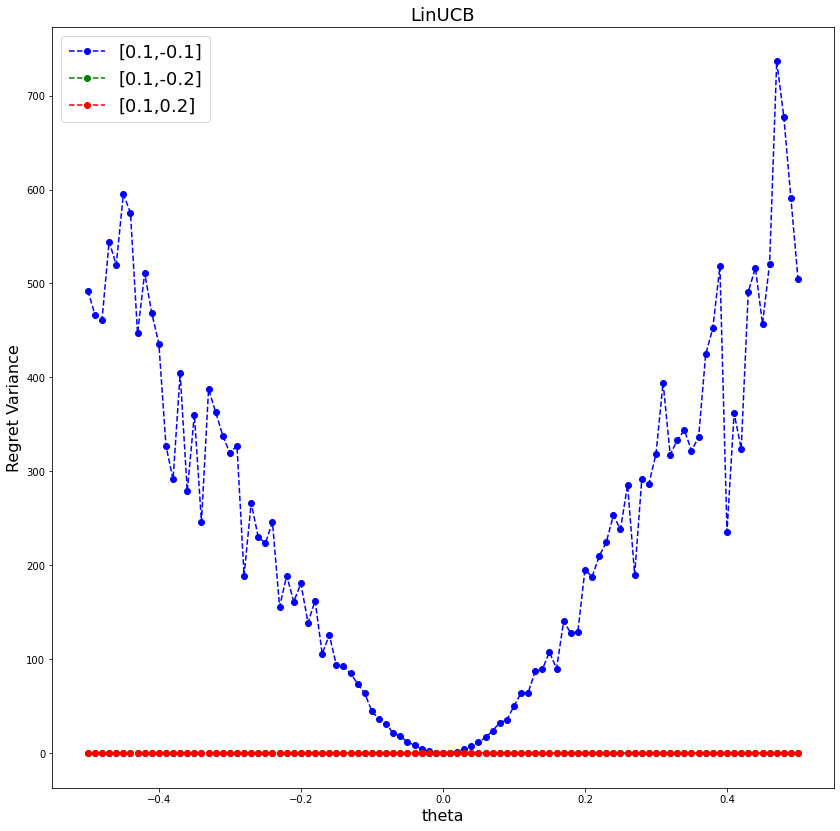

In [109]:
fig, ax = plt.subplots()
fig.set_figheight(14)
fig.set_figwidth(14)
plt.plot(theta1,x1['var'],"--bo",color='blue')
plt.plot(theta1,x2['var'],"--bo",color='green')
plt.plot(theta1,x3['var'],"--bo",color='red')
#plt.plot(sim44['mu1'],sim44['regret'],"--bo",color='black')

ax.set_title("LinUCB",fontsize=18)
ax.set_xlabel('theta', fontsize=16)
ax.set_ylabel('Regret Variance', fontsize=16)
plt.legend(['[0.1,-0.1]', '[0.1,-0.2]','[0.1,0.2]'],prop={'size': 18})
#ax.tick_params(axis='both', which='major', labelsize=16)

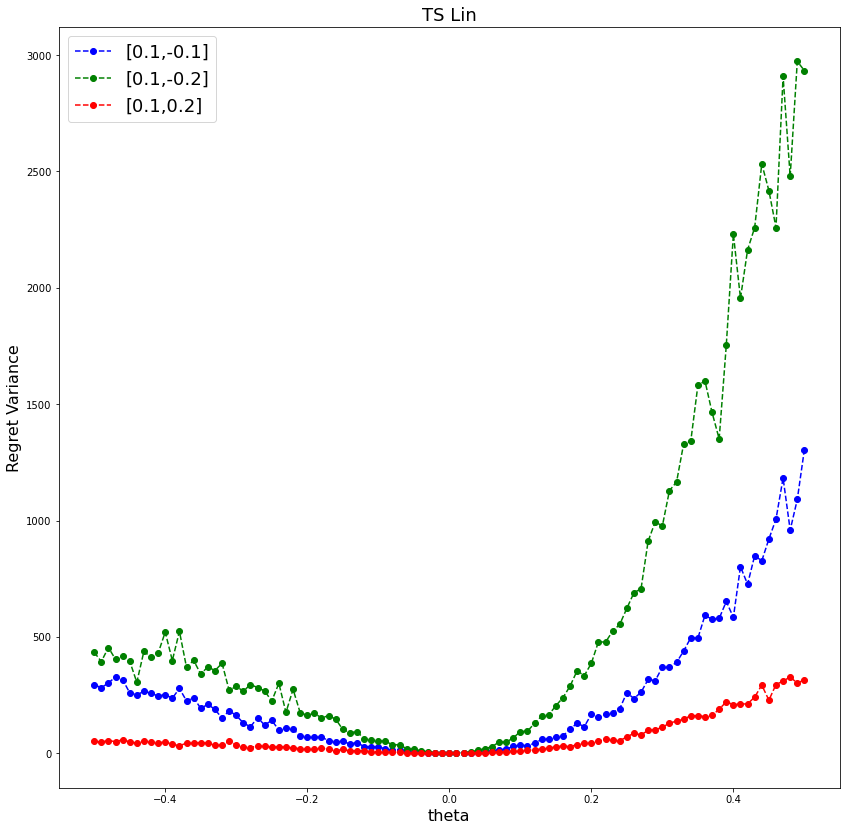

In [110]:
fig, ax = plt.subplots()
fig.set_figheight(14)
fig.set_figwidth(14)
plt.plot(theta1,xx1['var'],"--bo",color='blue')
plt.plot(theta1,xx2['var'],"--bo",color='green')
plt.plot(theta1,xx3['var'],"--bo",color='red')
#plt.plot(sim44['mu1'],sim44['regret'],"--bo",color='black')

ax.set_title("TS Lin",fontsize=18)
ax.set_xlabel('theta', fontsize=16)
ax.set_ylabel('Regret Variance', fontsize=16)
plt.legend(['[0.1,-0.1]', '[0.1,-0.2]','[0.1,0.2]'],prop={'size': 18})
#ax.tick_params(axis='both', which='major', labelsize=16)

In [80]:
def psq(alpha,beta,s,q):
    return (alpha+s) / (alpha + beta + q)

def wt(alpha,beta,s,q,t,n):
    if t == n:
        return psq(alpha,beta,s,q)
        
    return psq(alpha,beta,s,q)*(1+wt(alpha,beta,s+1,q+1,t+1,n)) + (1-psq(alpha,beta,s,q))*wt(alpha,beta,s,q+1,t+1,n)

def wt2(t,n):
    if t == n:
        return 0.5
    return 0.5+wt2(t+1,n)

def bayesian_optimal_policy(n,mu1,p1):
    # n is the horizon (number of iterations)
    # mu2 is the true mean of bandit 2
    # p1 is the prior distribution for bandit 1
    # p2 is the prior distriubtion for bandit 2
    wt1 = [0]
    rewards1 = []
    regret = 0
    rewards2 = []
    visits = [0,0]
    dist1 = p1
    opt_mu = mu1 if mu1 > 0.5 else 0.5
    for t in range(n,0,-1): 
        w1 = 0
        w2 = 0
        for i in range(t):
            w1 = wt(dist1[0],dist1[1],i,i,t,n)
            w2 = wt2(t,n)
        
            arm = np.argmax([w1,w2])

            if arm == 0:
                reward = pullBernoulli(mu1)
                rewards1 += [reward]
                regret += abs((opt_mu-mu1))
                visits[0] += 1
                dist1 = calculate_posterior_value_bernoulli(reward,dist1[0],dist1[1])

            else:
                reward = 0.5
                rewards2 += [reward]
                regret += abs(opt_mu-0.5)
                visits[1] += 1
    
        
    return regret

def simulationN_BOP(mu1,p1,n=20,num_sim=1000):
    point_lst = []
    var_lst = []
    for i in tqdm(mu1):
        simulation = [bayesian_optimal_policy(n=n,mu1=i,p1=p1) for a in range(num_sim)]
        point = np.mean(simulation)
        #print(point)
        var = np.var(simulation)
        point_lst += [point]
        var_lst += [var]
    df = pd.DataFrame()
    df['mu1'] = mu1
    df['regret'] = point_lst
    df['var'] = var_lst
    return df

In [111]:
mu1 = [0.05*i for i in range(0,21)]

In [112]:
sim1 = simulationN_BOP(mu1,p1=[1,1],num_sim=10)
sim2 = simulationN_BOP(mu1,p1=[1,3],num_sim=10)
sim3 = simulationN_BOP(mu1,p1=[10,10],num_sim=10)
sim4 = simulationN_BOP(mu1,p1=[10,30],num_sim=10)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [09:44<00:00, 27.83s/it]


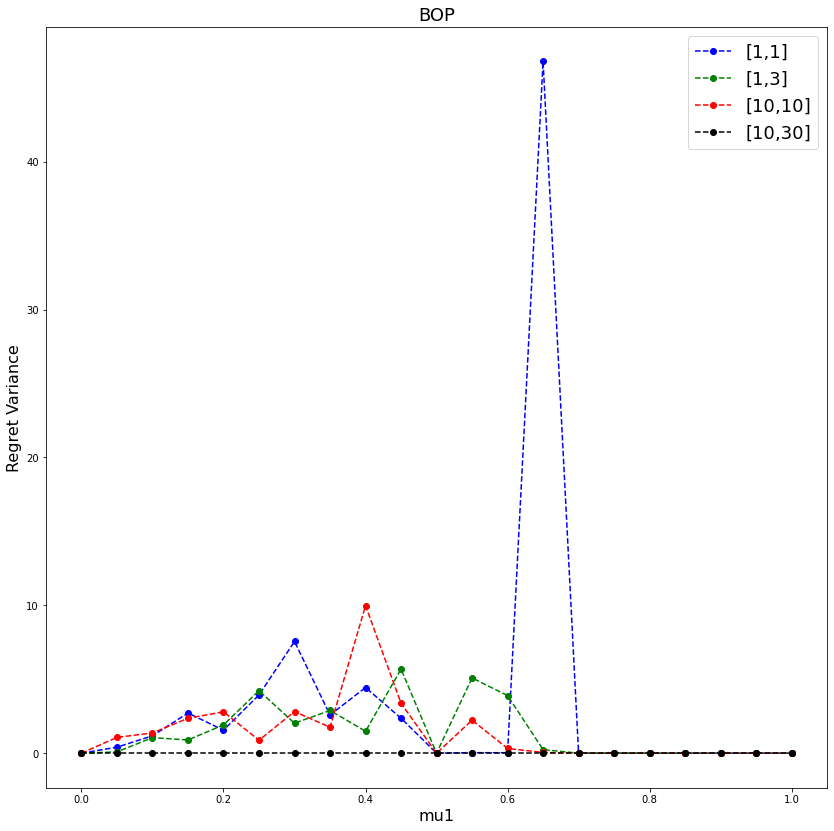

In [116]:
fig, ax = plt.subplots()
fig.set_figheight(14)
fig.set_figwidth(14)
plt.plot(mu1,sim1['var'],"--bo",color='blue')
plt.plot(mu1,sim2['var'],"--bo",color='green')
plt.plot(mu1,sim3['var'],"--bo",color='red')
plt.plot(mu1,sim4['var'],"--bo",color='black')
#=plt.plot(sim44['mu1'],sim44['regret'],"--bo",color='black')

ax.set_title("BOP",fontsize=18)
ax.set_xlabel('mu1', fontsize=16)
ax.set_ylabel('Regret Variance', fontsize=16)
plt.legend(['[1,1]', '[1,3]','[10,10]','[10,30]'],prop={'size': 18})
#ax.tick_params(axis='both', which='major', labelsize=16)

# Simulation Runs

In [145]:
df_ETC_1

,mu2,25point,25error,50point,50error,75point,75error,100point,100error,1000point,1000error
0,0.01,5.0475,0.150276,4.937,0.142360,4.5835,0.133817,4.856,0.126472,4.90020,1.578450e-01
1,0.02,9.5250,0.300191,9.316,0.283924,9.3540,0.268150,9.488,0.252590,9.70060,3.156111e-01
2,0.03,14.1165,0.449983,13.137,0.423035,13.2150,0.399419,13.368,0.376136,14.58084,4.734441e-01
3,0.04,18.2520,0.598584,17.480,0.563886,16.6680,0.527424,16.000,0.490143,20.19960,6.314749e-01
4,0.05,21.2950,0.742217,19.510,0.690352,20.1550,0.654612,19.360,0.607091,24.60080,7.892820e-01
...,...,...,...,...,...,...,...,...,...,...,...
95,0.96,24.0000,0.000000,48.000,0.000000,72.0000,0.000000,96.000,0.000000,23.95392,9.139200e-01
96,0.97,24.2500,0.000000,48.500,0.000000,72.7500,0.000000,97.000,0.000000,23.28000,2.248058e-16
97,0.98,24.5000,0.000000,49.000,0.000000,73.5000,0.000000,98.000,0.000000,23.47492,9.349200e-01
98,0.99,25.6905,0.940500,49.500,0.000000,74.2500,0.000000,99.000,0.000000,22.77000,0.000000e+00


In [206]:
mu2_fast = [0.01*i for i in range(0,101,10)]

In [233]:
UCB_KL(n=1000,mu2=0.4,gaussian=1)

0

In [168]:
# Simulation Runs

# ETC 
mu2 = [0.01*i for i in range(1,101)]
m = [25,50,75,100,1000]
df_ETC_1 = simulationN(mu2,m,gaussian=1,num_sim=1000)
df_ETC_2 = simulationN(mu2,m,gaussian=2,num_sim=1000)

 28%|██████████████████████▋                                                          | 28/100 [00:11<00:27,  2.60it/s]


 58%|██████████████████████████████████████████████▉                                  | 58/100 [00:33<00:24,  1.72it/s]


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [01:07<00:11,  1.05it/s]


 21%|█████████████████                                                                | 21/100 [00:04<00:16,  4.77it/s]


 51%|█████████████████████████████████████████▎                                       | 51/100 [00:18<00:17,  2.75it/s]


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [00:45<00:10,  1.82it/s]


 14%|███████████▎                                                                     | 14/100 [00:17<02:42,  1.89s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [04:11<00:00, 50.24s/it]


In [170]:
%store df_ETC_1
%store df_ETC_2

Stored 'df_ETC_1' (DataFrame)
Stored 'df_ETC_2' (DataFrame)


In [11]:
mu2 = [0.01*x for x in range(101)]

In [234]:
df = simulationN_standard(mu2) 

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [2:19:09<00:00, 83.50s/it]


In [235]:
%store df

Stored 'df' (DataFrame)


In [242]:
df2 = simulationN_asymptotic(mu2) 

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [2:45:36<00:00, 99.37s/it]


In [243]:
%store df2

Stored 'df2' (DataFrame)


In [244]:
df3 = simulationN_moss(mu2) 

  0%|                                                                                          | 0/100 [00:05<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
df_ber = simulationN_standard(mu2,gaussian=2)
%store df_ber

In [ ]:
%store df3

In [207]:
df4 = simulationN_KL(mu2_fast,num_sim=1000)

 18%|██████████████▌                                                                 | 2/11 [14:16<1:04:13, 428.19s/it]


KeyboardInterrupt: 

In [203]:
df4

,point,var
0,0.0000,0.000000
1,4.5090,1996.593219
2,23.9720,8987.021616
3,14.0630,4682.908881
4,38.9040,10098.687384
5,20.1325,4575.066819
6,24.4660,4171.557644
7,35.9625,4080.225769
8,20.0540,1585.885884
9,15.4470,527.938891


# Plots

Text(0, 0.5, 'Average Total Regret')

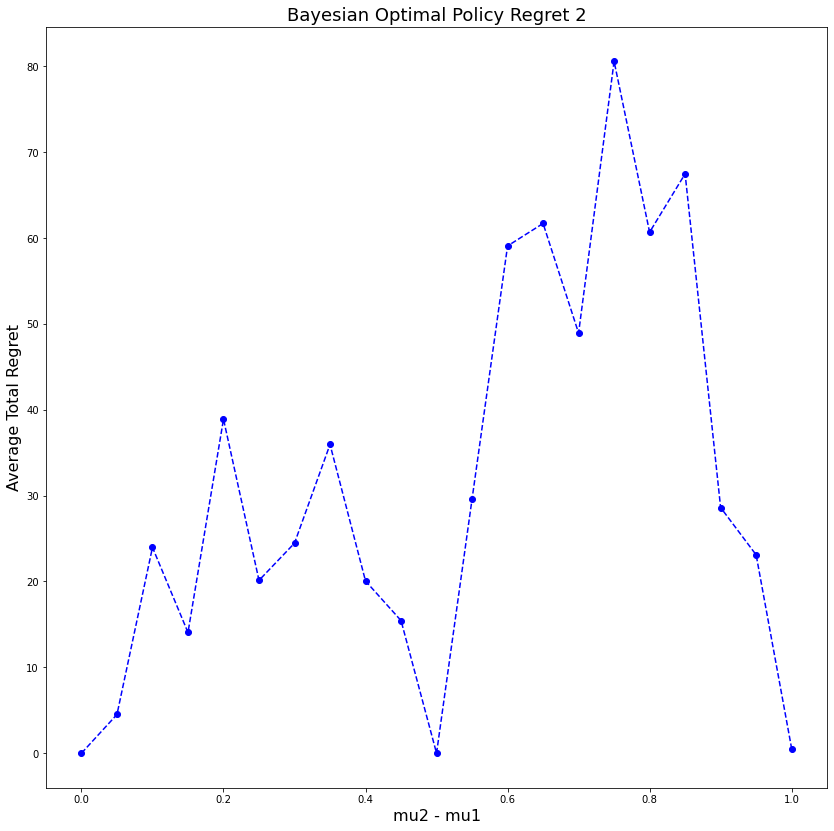

In [205]:
fig, ax = plt.subplots()
fig.set_figheight(14)
fig.set_figwidth(14)
plt.plot(mu2_fast,df4['point'],"--bo",color='blue')
#plt.plot(mu2,df2['point'],"--bo",color='green')
#plt.plot(mu2,df33['point'],"--bo",color='red')
#plt.plot(sim44['mu1'],sim44['regret'],"--bo",color='black')

ax.set_title("Bayesian Optimal Policy Regret 2",fontsize=18)
ax.set_xlabel('mu2 - mu1', fontsize=16)
ax.set_ylabel('Average Total Regret', fontsize=16)
#plt.legend(['[1,1]', '[1,3]','[10,10]','[10,30]'],prop={'size': 18})
#ax.tick_params(axis='both', which='major', labelsize=16)

Text(0, 0.5, 'Average Total Regret')

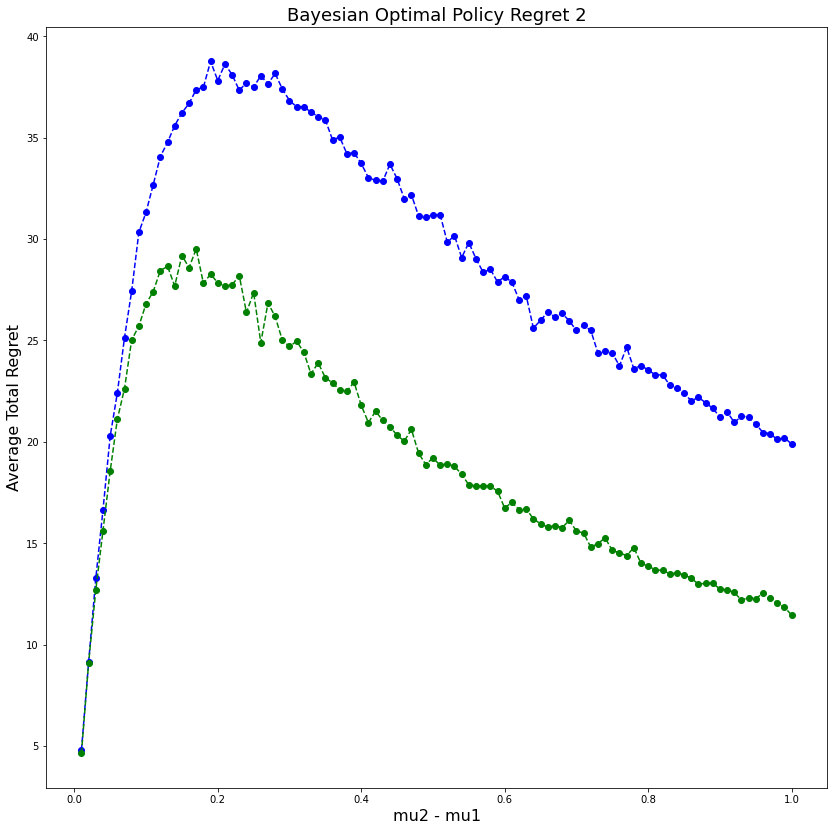

In [245]:
fig, ax = plt.subplots()
fig.set_figheight(14)
fig.set_figwidth(14)
plt.plot(mu2,df['point'],"--bo",color='blue')
plt.plot(mu2,df2['point'],"--bo",color='green')
#plt.plot(mu2,df33['point'],"--bo",color='red')
#plt.plot(sim44['mu1'],sim44['regret'],"--bo",color='black')

ax.set_title("Bayesian Optimal Policy Regret 2",fontsize=18)
ax.set_xlabel('mu2 - mu1', fontsize=16)
ax.set_ylabel('Average Total Regret', fontsize=16)
#plt.legend(['[1,1]', '[1,3]','[10,10]','[10,30]'],prop={'size': 18})
#ax.tick_params(axis='both', which='major', labelsize=16)